## i. Introduction
Marchelly Gideon Tambunan

Dataset: Customer Churn

Objective : Creating a model for predicting  customers churn risk from using our products.

Deployment URL: https://huggingface.co/spaces/gdntmbnn/Churn-Prediction

# ii. Import Library

In [1]:
#Importing Pandas and Numpy Library
import pandas as pd
import numpy as np

#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

#Importing our Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Importing our Train and Test split
from sklearn.model_selection import train_test_split

#For removing outliers
from feature_engine.outliers import Winsorizer

#For preprocessing purposes 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#For evaluation purposes
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

#For deployment purposes
import pickle

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Setting random seed so our trained data result stays consistent
np.random.seed(50)

# iii. Data Loading

In this section, we will load our dataset with missing value parameter is not usual.

In [2]:
# load the dataset
df_asli = pd.read_csv('churn.csv',na_values=[" ", "-", "?" ,"n/a", "na", "--"])
df = df_asli.copy()
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [3]:
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


Here we can see our first and last rows of data

In [4]:
# Look dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Here we can see our dataset have 37010 rows and 22 columns. We wil explain abour our columns meaning

|No|Column Name|Description|
|-|----|----|
|1|user_id|ID of a customer|
|2|age|Age of a customer|
|3|gender|Gender of a customer|
|4|region_category|Region that a customer belongs to|
|5|membership_category|	Category of the membership that a customer is using|
|6|joining_date|Date when a customer became a member|
|7|joined_through_referral|Whether a customer joined using any referral code or ID|
|8|preferred_offer_types|Type of offer that a customer prefers|
|9|medium_of operation|Medium of operation that a customer uses for transactions|
|10|internet_option|Type of internet service a customer uses|
|11|last_visit_time|The last time a customer visited the website|
|12|days_since_last_login|Number of days since a customer last logged into the website|
|13|avg_time_spent|Average time spent by a customer on the website|
|14|avg_transaction_value|Average transaction value of a customer|
|15|avg_frequency_login_days|Number of times a customer has logged in to the website|
|16|points_in_wallet|Points awarded to a customer on each transaction|
|17|used_special_discount|Whether a customer uses special discounts offered|
|18|offer_application_preference|Whether a customer prefers offers|
|19|past_complaint|Whether a customer has raised any complaints|
|20|complaint_status|Whether the complaints raised by a customer was resolved|
|21|feedback|Feedback provided by a customer|
|22|churn_risk_score|Churn Score: <br> 0=Not churn <br> 1=Churn|

In [5]:
# Check Missing Value
df.isna().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Here we can see there's missing value on our dataset. We will handle it on Feature Engineering

In [6]:
# Check duplicated data
df.duplicated().sum()

18

we also have duplicated data and we will drop

In [7]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [8]:
# Check duplicated data
df.duplicated().sum()

0

In [9]:
# Check Descriptive Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,36992.0,279.147450,329.947709,0.00,60.1025,161.765,356.5150,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.46,14177.5400,27554.485,40855.1100,99914.050000
avg_frequency_login_days,36992.0,14.658617,9.479184,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,36992.0,623.562421,270.263994,0.00,574.1350,680.370,757.0025,2069.069761
churn_risk_score,36992.0,0.540982,0.498324,0.00,0.0000,1.000,1.0000,1.000000


here we can see the days_since_last_login have minimal at -999 as we know days_since_last_login minimal is 0.

In [10]:
# Check Categorical Descriptive Dataset
df.describe(exclude=[np.number]).T

,count,unique,top,freq
user_id,36992,36992,9f420209e7d129f3,1
gender,36933,2,F,18490
region_category,31564,3,Town,14128
membership_category,36992,6,Basic Membership,7724
joining_date,36992,1096,2015-06-02,55
joined_through_referral,31554,2,No,15839
preferred_offer_types,36704,3,Gift Vouchers/Coupons,12349
medium_of_operation,31599,3,Desktop,13913
internet_option,36992,3,Wi-Fi,12413
last_visit_time,36992,30101,07:56:41,6


We also have some categorical columns with high unique value such as user_id, joining_date, and last_visit_time

### Data cleaning

After that, we will masking days_since_last_login column with negative value with 0

In [11]:
# masking values on days_since_last_login
df['days_since_last_login'].replace(to_replace=-999, value=0, inplace=True)

We will drop column with high unique values since this kind of data is not good for our models.

In [12]:
# Drop user_id, joining_date, and last_visit_time
df.drop(['user_id', 'joining_date', 'last_visit_time'], axis=1, inplace=True)

# iv. Exploratory Data Analysis

Before we do some Exploration about our data, we will split our data into numerical and categorical columns

In [13]:
num_cols = df.select_dtypes(["int", "float"])
cat_cols = df.select_dtypes(["category", "object"]).columns

After we spliting the dataset, we need to drop target column on num_cols because the target column is boolean data type

In [14]:
num_cols = num_cols.drop(['churn_risk_score'], axis = 1).columns.tolist()
num_cols

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

### Target Analysis

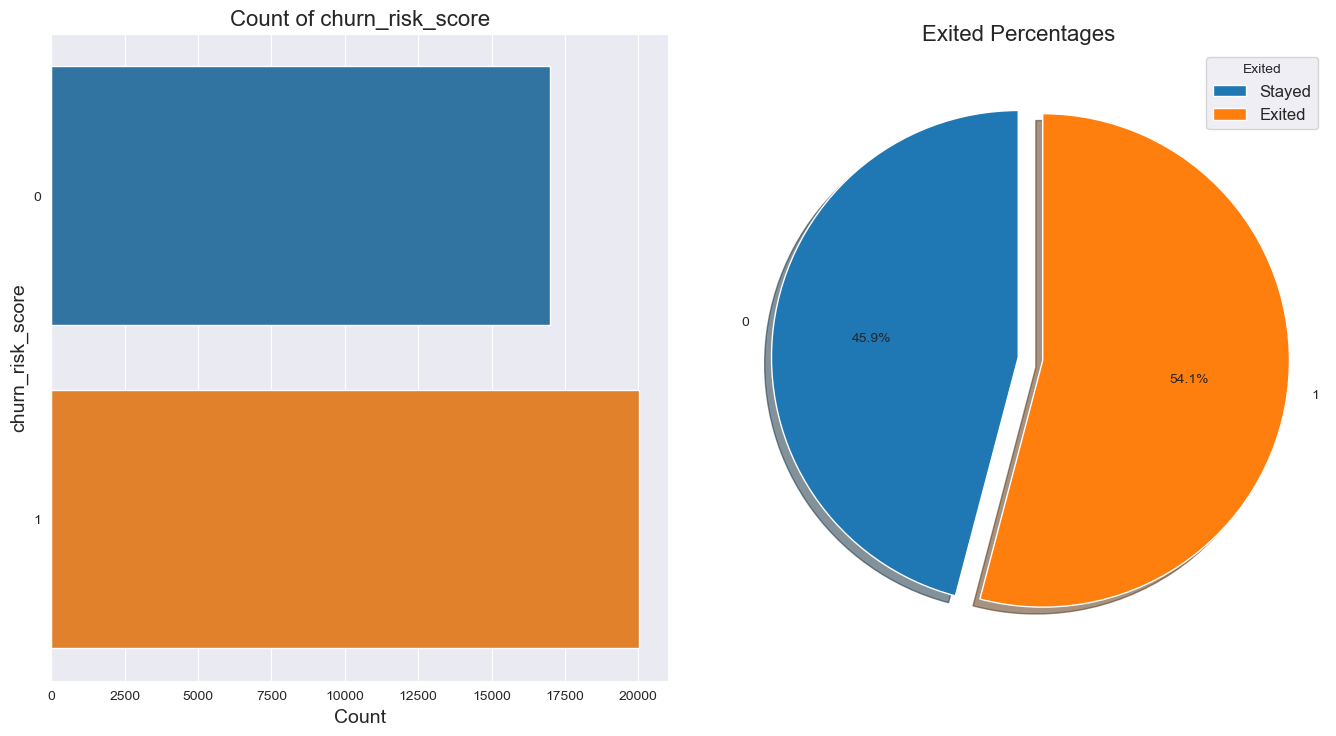

In [15]:
# Set figure size and style
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')

# Create subplot 1 for countplot
plt.subplot(1, 2, 1)
sns.countplot(y='churn_risk_score', data=df)
plt.title('Count of churn_risk_score', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('churn_risk_score', fontsize=14)

# Create subplot 2 for pie chart
plt.subplot(1, 2, 2)
plt.pie(df.groupby('churn_risk_score').size(), 
        labels=df.groupby('churn_risk_score').size().index, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=90, 
        explode=(0, 0.1))
plt.title('Exited Percentages', fontsize=16)
plt.legend(title='Exited', loc='upper right', labels=['Stayed', 'Exited'], fontsize=12)

# Adjust layout and spacing
plt.tight_layout(pad=3)

# Show the plot
plt.show()

As we can see our dataset is quite balanced, so when our model try to learn the pattern the data provides a balanced target variable so we don't need to do any handling.

### Numerical column

<AxesSubplot:xlabel='days_since_last_login', ylabel='avg_transaction_value'>

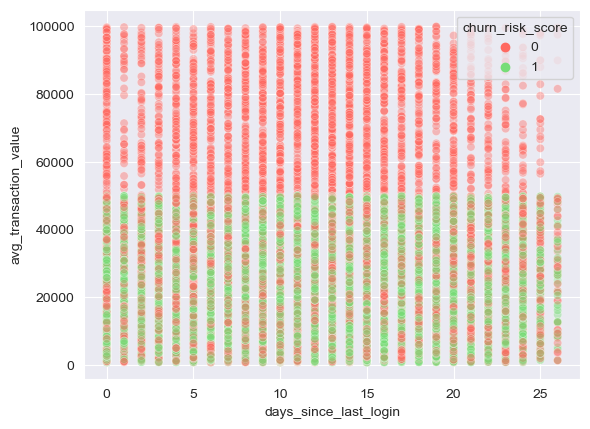

In [16]:
# Define a brighter color palette
bright_colors = ["#FF6961", "#77DD77"]

# Set the color palette and plot the scatter plot
sns.set_palette(bright_colors)
sns.scatterplot(data=df, x='days_since_last_login', y='avg_transaction_value', hue='churn_risk_score', alpha=0.4)

We see that customer who churn and not churn doesn't show us clear picture from days since last login. But we know that people with higher transaction value will to not churn.

<AxesSubplot:xlabel='avg_frequency_login_days', ylabel='avg_transaction_value'>

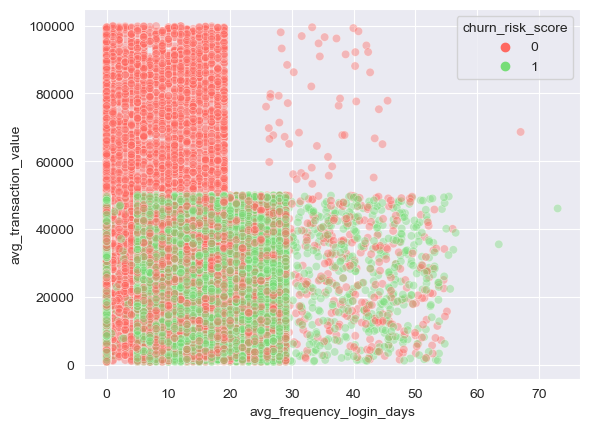

In [17]:
# Define a brighter color palette
bright_colors = ["#FF6961", "#77DD77"]

# Set the color palette and plot the scatter plot
sns.set_palette(bright_colors)
sns.scatterplot(data=df, x='avg_frequency_login_days', y='avg_transaction_value', hue='churn_risk_score', alpha=0.4)

We can see here that people who not churn are the one who use our services more frequently than those who churn.

<AxesSubplot:xlabel='points_in_wallet', ylabel='avg_transaction_value'>

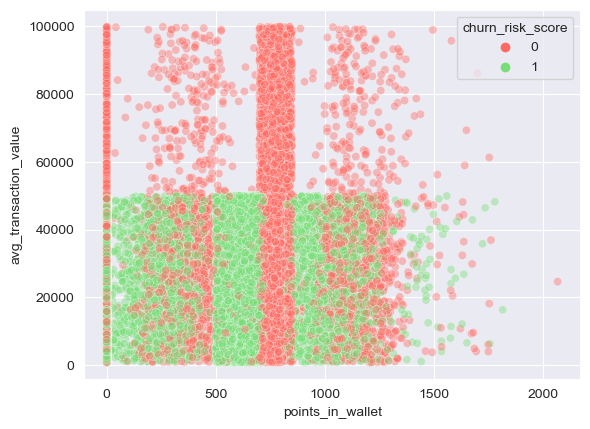

In [18]:
# Define a brighter color palette
bright_colors = ["#FF6961", "#77DD77"]

# Set the color palette and plot the scatter plot
sns.set_palette(bright_colors)
sns.scatterplot(data=df, x='points_in_wallet', y='avg_transaction_value', hue='churn_risk_score', alpha=0.4)

We fail to see any relationship, because it's not clear the patern with people who has high points and not, affects our churn rate.

#### Checking Distribution and outlier

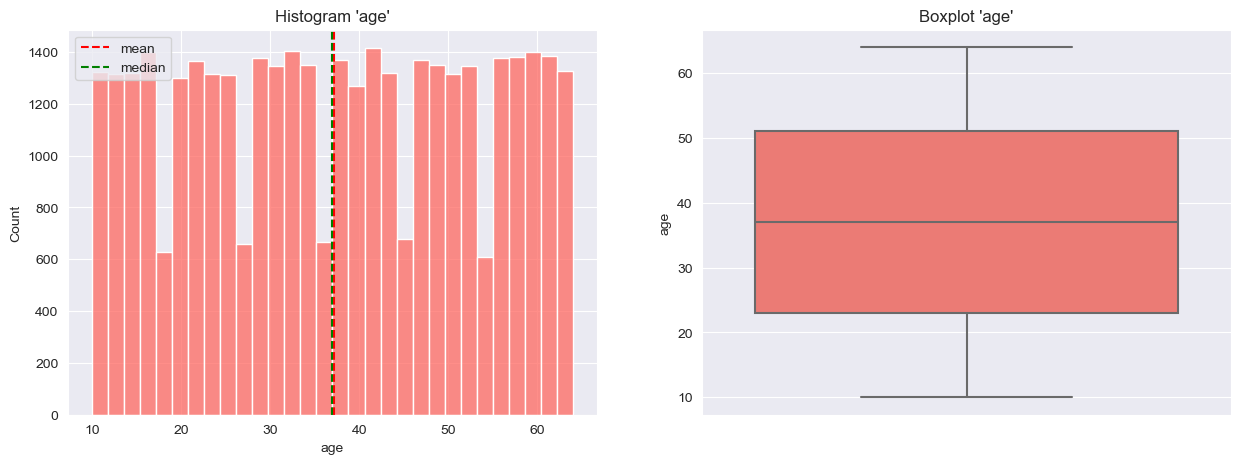

age Kurtosis: -1.1987327113107538
age Skewness: -0.007319319267324801
Columns 'age' Normal Distribution


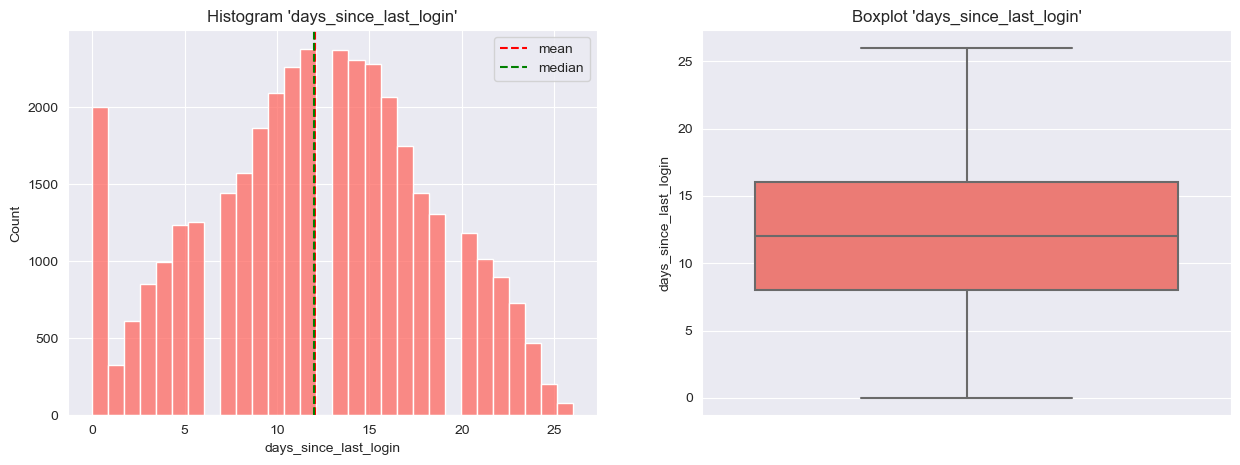

days_since_last_login Kurtosis: -0.62045617426512
days_since_last_login Skewness: -0.12645120399100954
Columns 'days_since_last_login' Normal Distribution


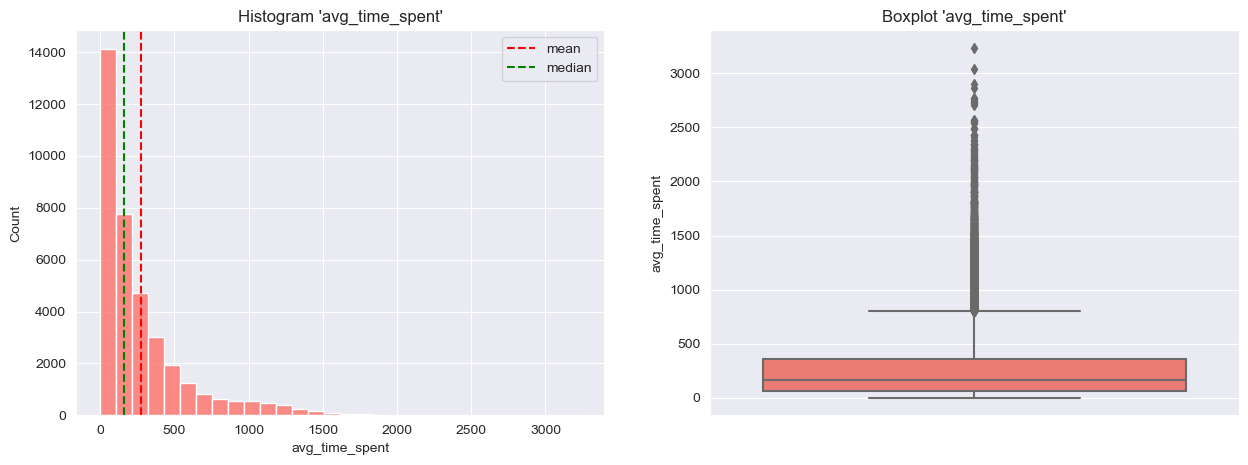

avg_time_spent Kurtosis: 6.503681785862877
avg_time_spent Skewness: 2.2765487001579205
Columns 'avg_time_spent' Right Highly Skewed


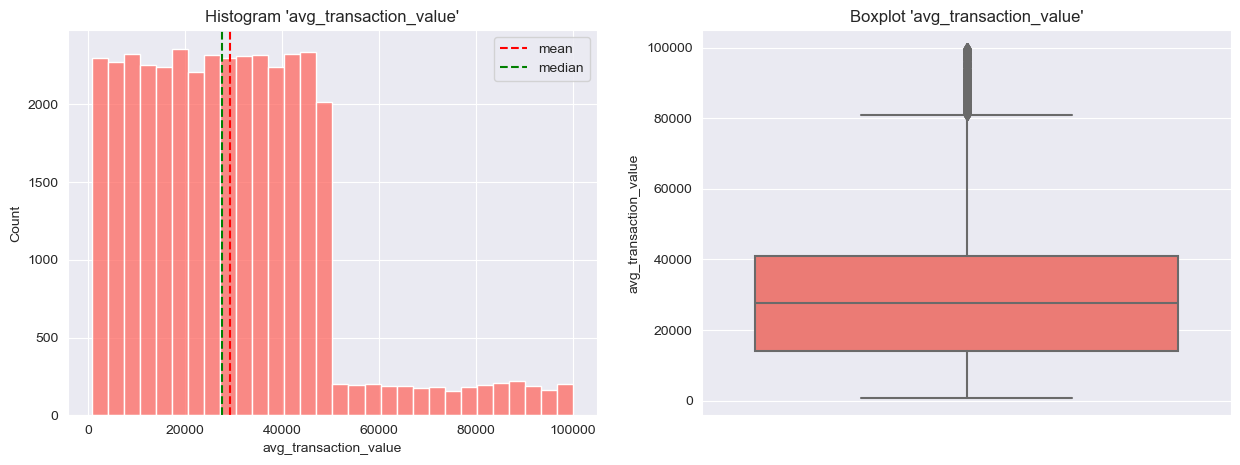

avg_transaction_value Kurtosis: 1.428287011596546
avg_transaction_value Skewness: 1.0110271627457472
Columns 'avg_transaction_value' Right Highly Skewed


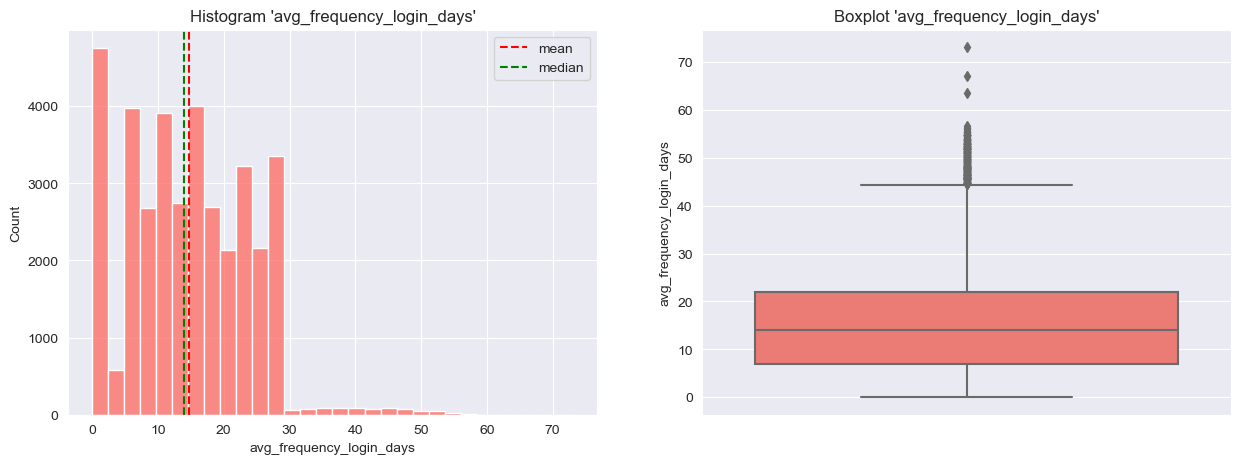

avg_frequency_login_days Kurtosis: 0.26815671188216283
avg_frequency_login_days Skewness: 0.38986070002523915
Columns 'avg_frequency_login_days' Normal Distribution


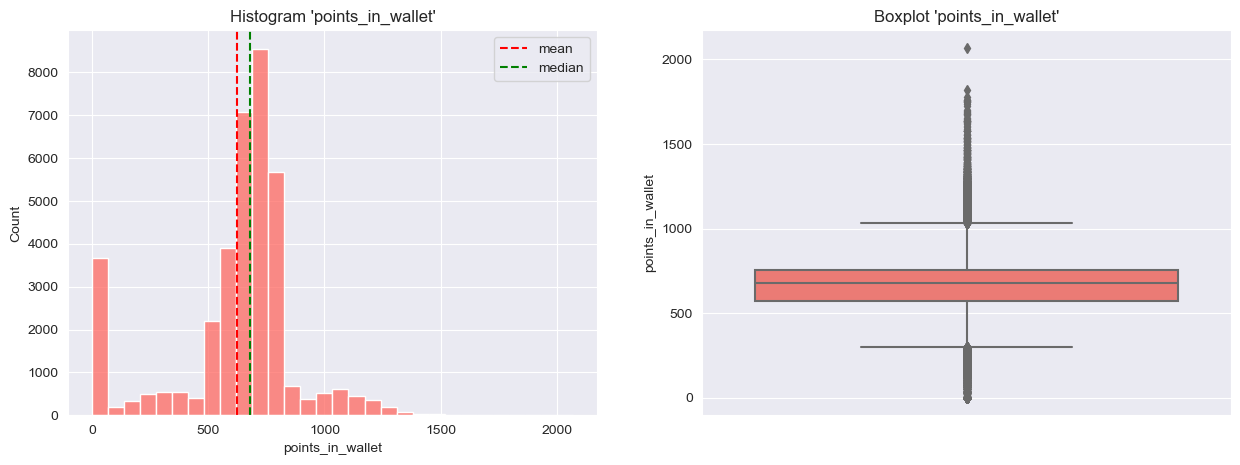

points_in_wallet Kurtosis: 1.3336663397856174
points_in_wallet Skewness: -0.7734917908458531
Columns 'points_in_wallet' Left Moderately Skewed


In [19]:
def dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' Normal Distribution".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' Right Moderately Skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' Right Highly Skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' Left Moderately Skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' Left Highly Skewed".format(col))

df_num = df[num_cols]

for col in df_num.columns:
    dist(df[num_cols], col)

Here we confirmed our earlier guess that some of our data are skewed and have some outliers, this will need some handling on fetures engineering.

### Categorical Column

we will see some visualize of our categorical columns

<Figure size 1800x800 with 0 Axes>

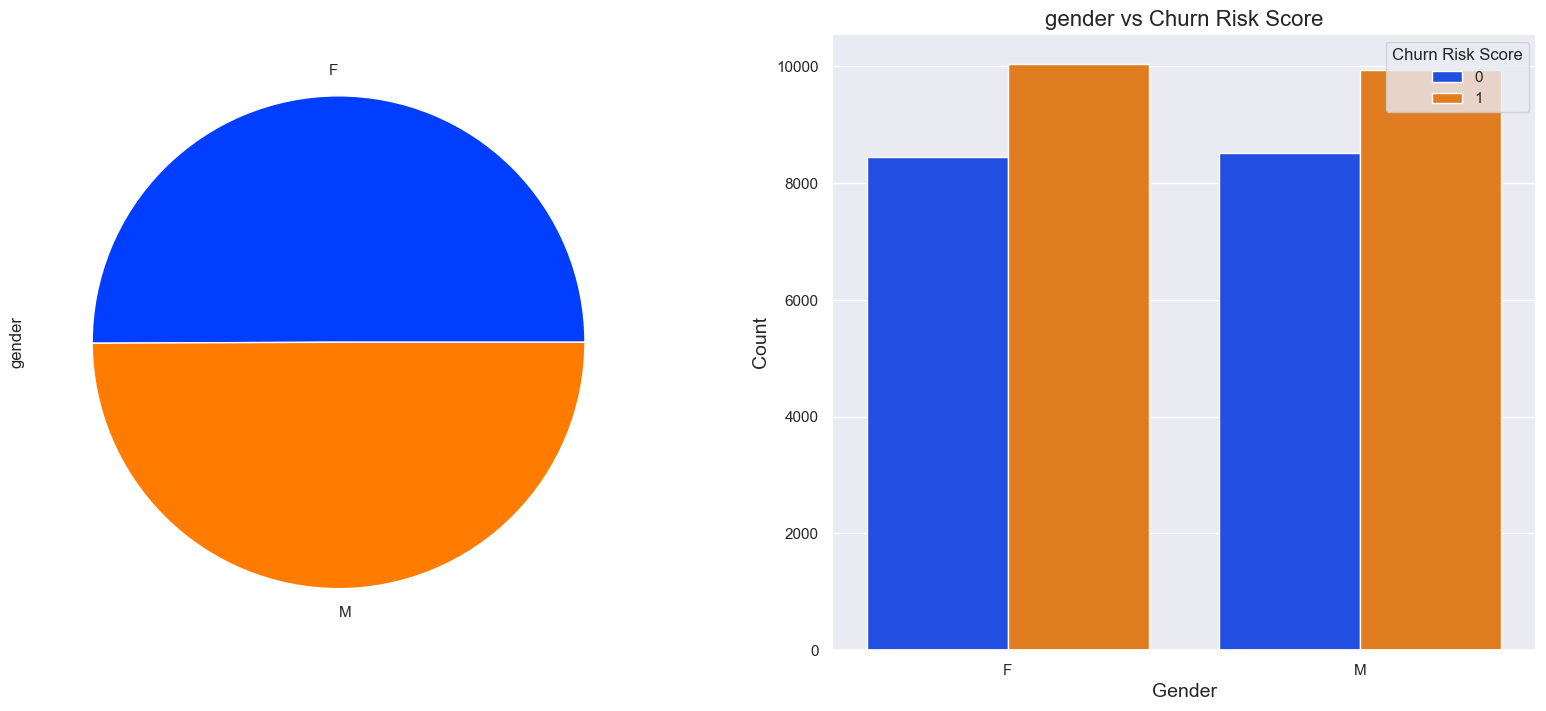

<Figure size 1800x800 with 0 Axes>

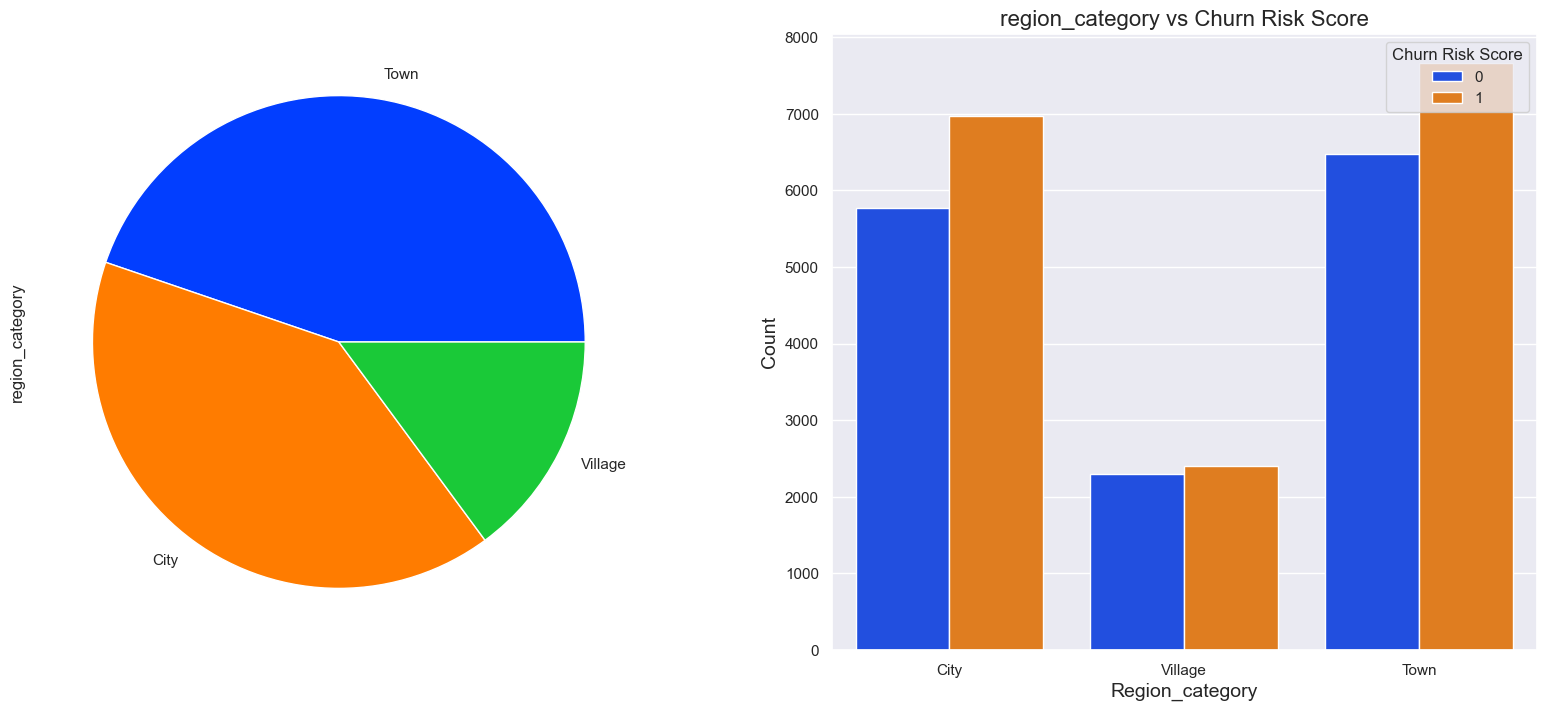

<Figure size 1800x800 with 0 Axes>

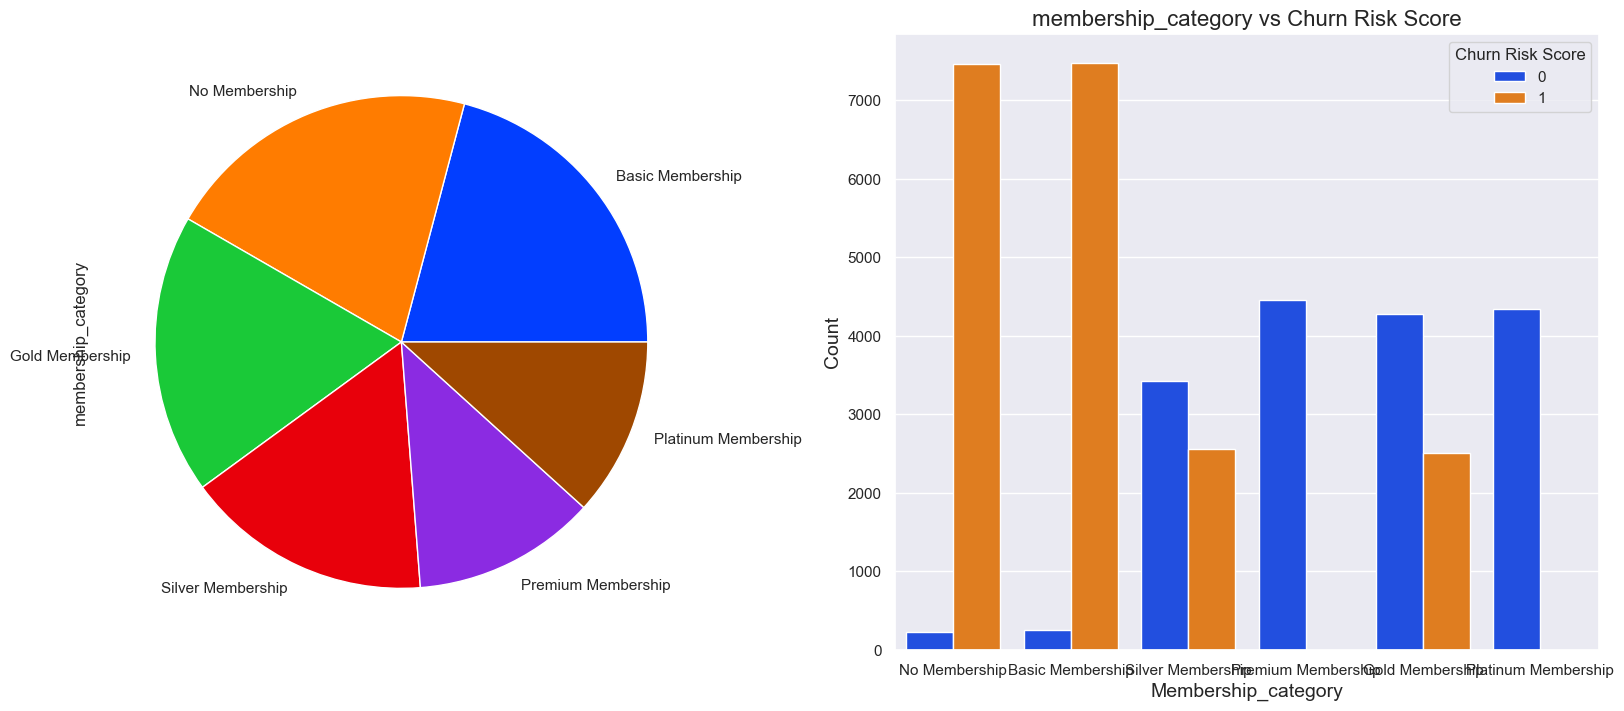

<Figure size 1800x800 with 0 Axes>

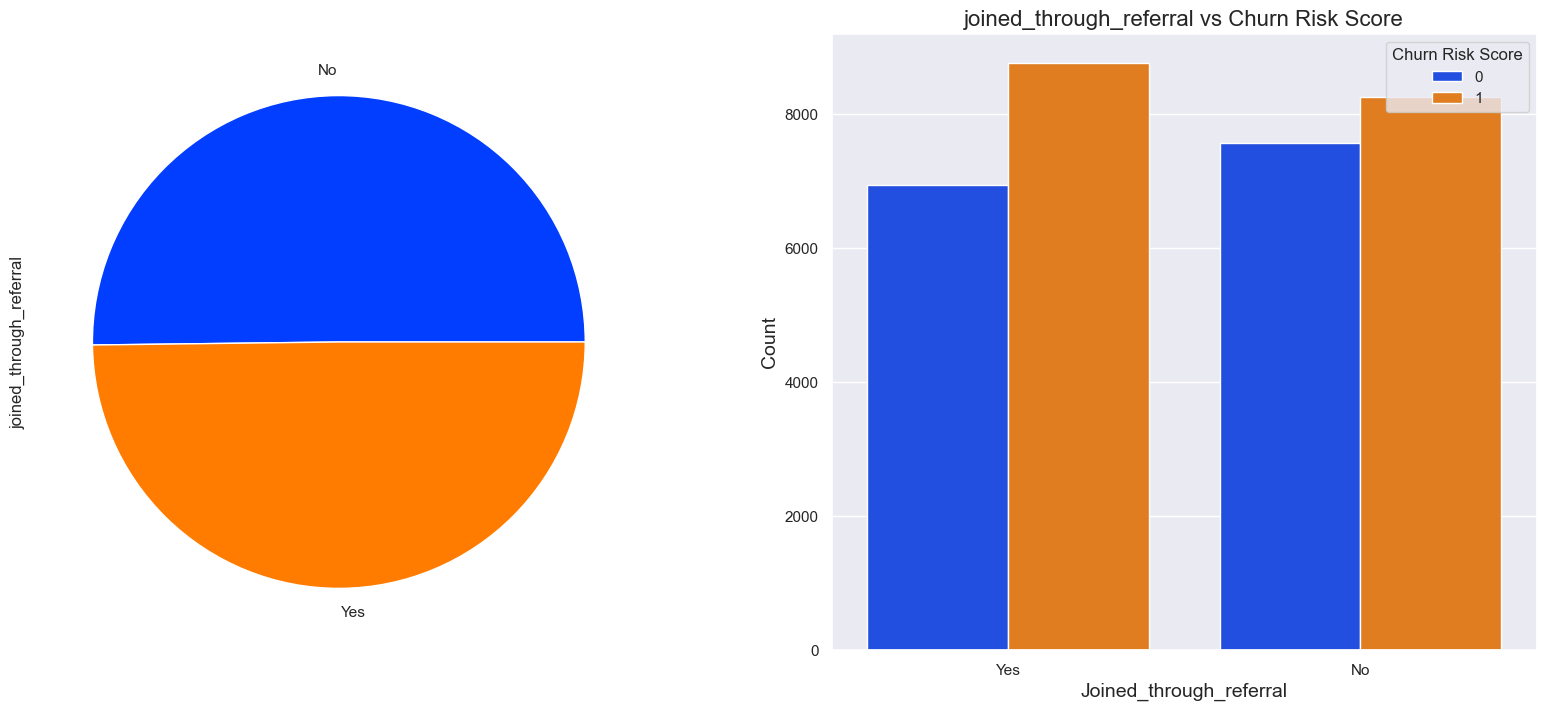

<Figure size 1800x800 with 0 Axes>

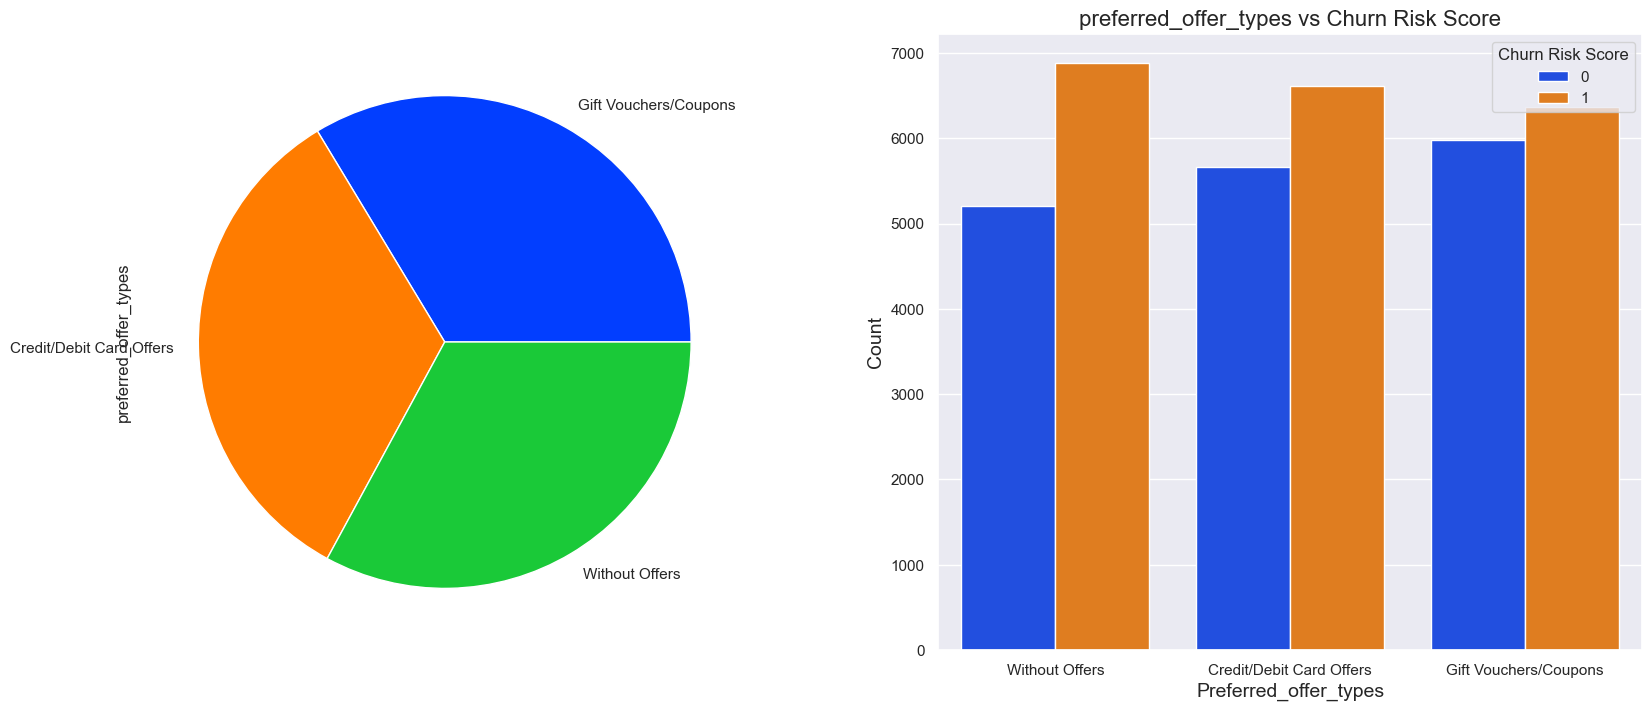

<Figure size 1800x800 with 0 Axes>

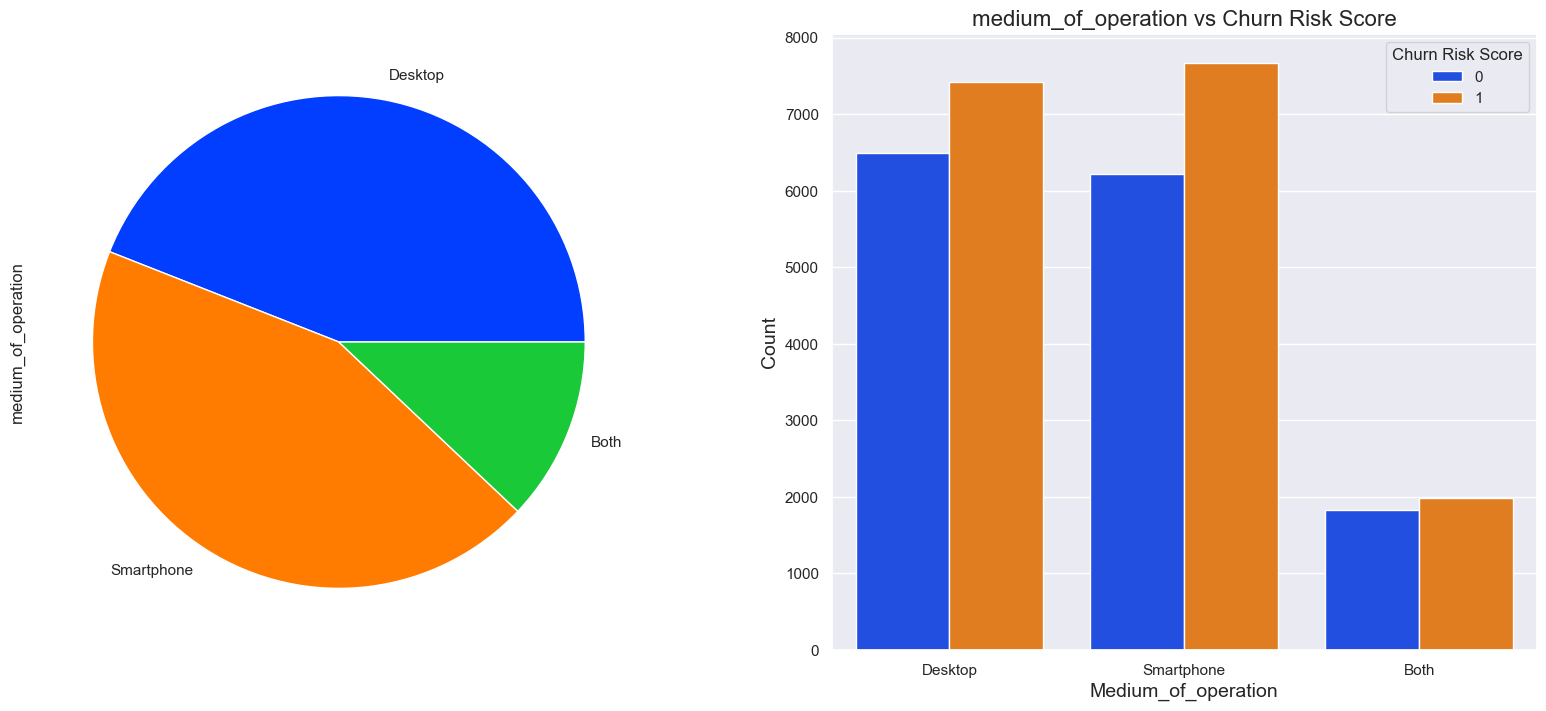

<Figure size 1800x800 with 0 Axes>

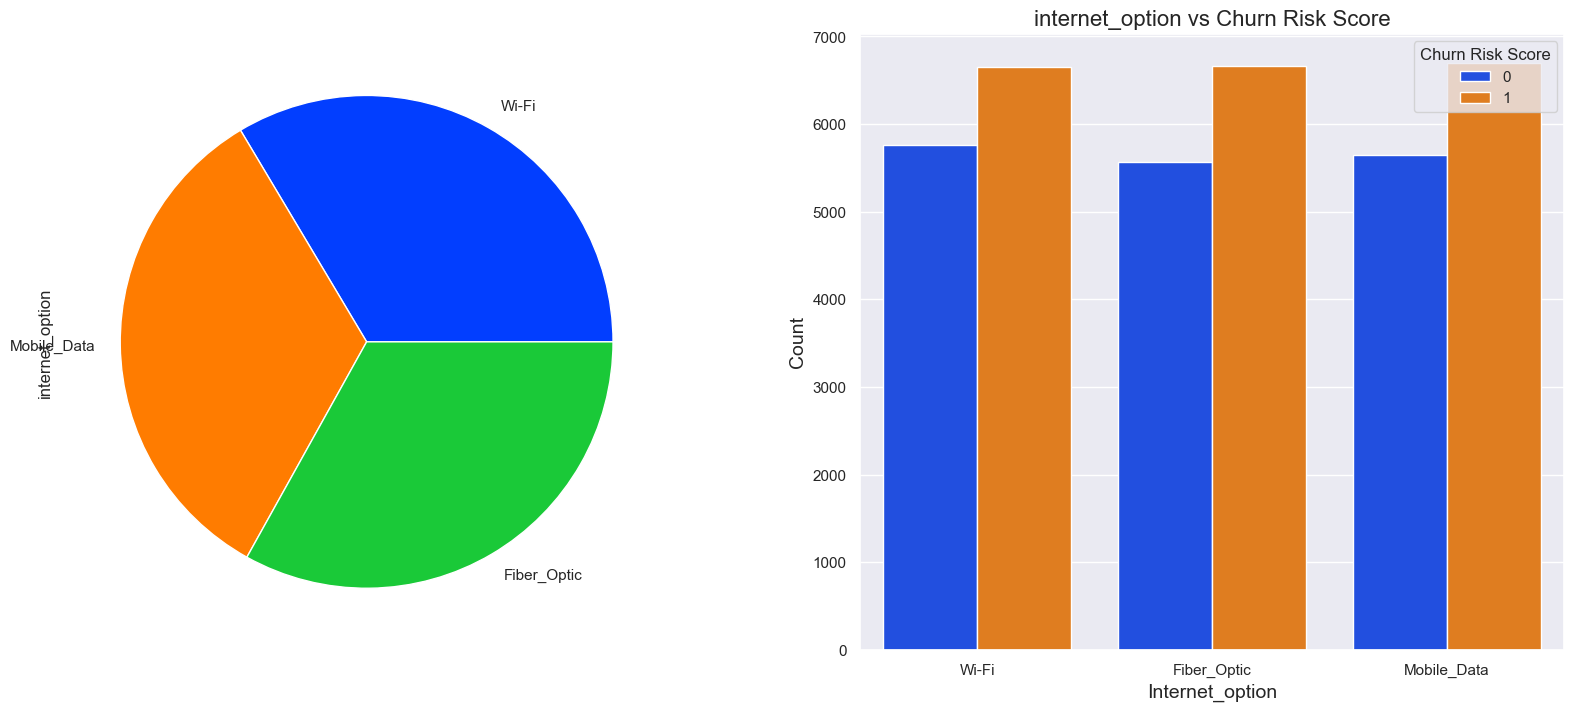

<Figure size 1800x800 with 0 Axes>

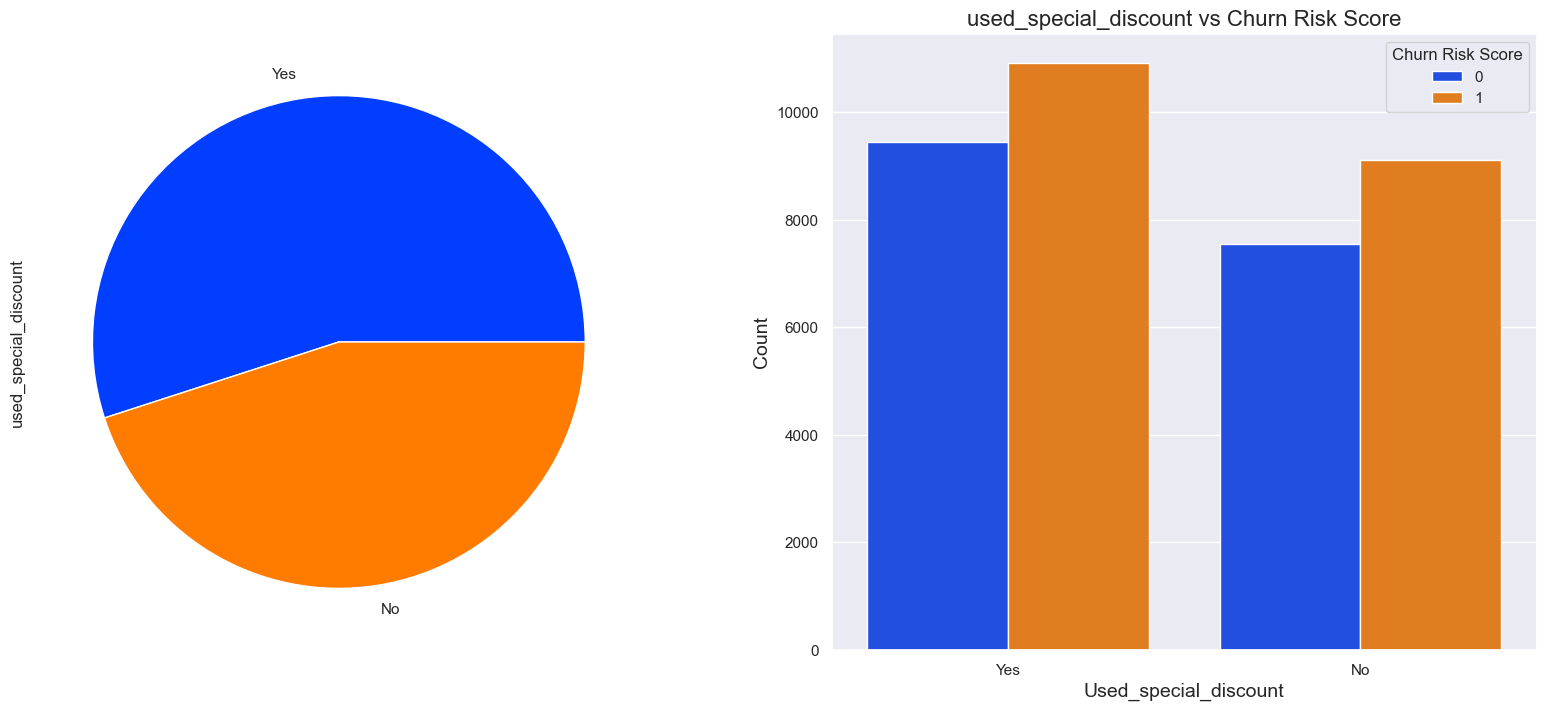

<Figure size 1800x800 with 0 Axes>

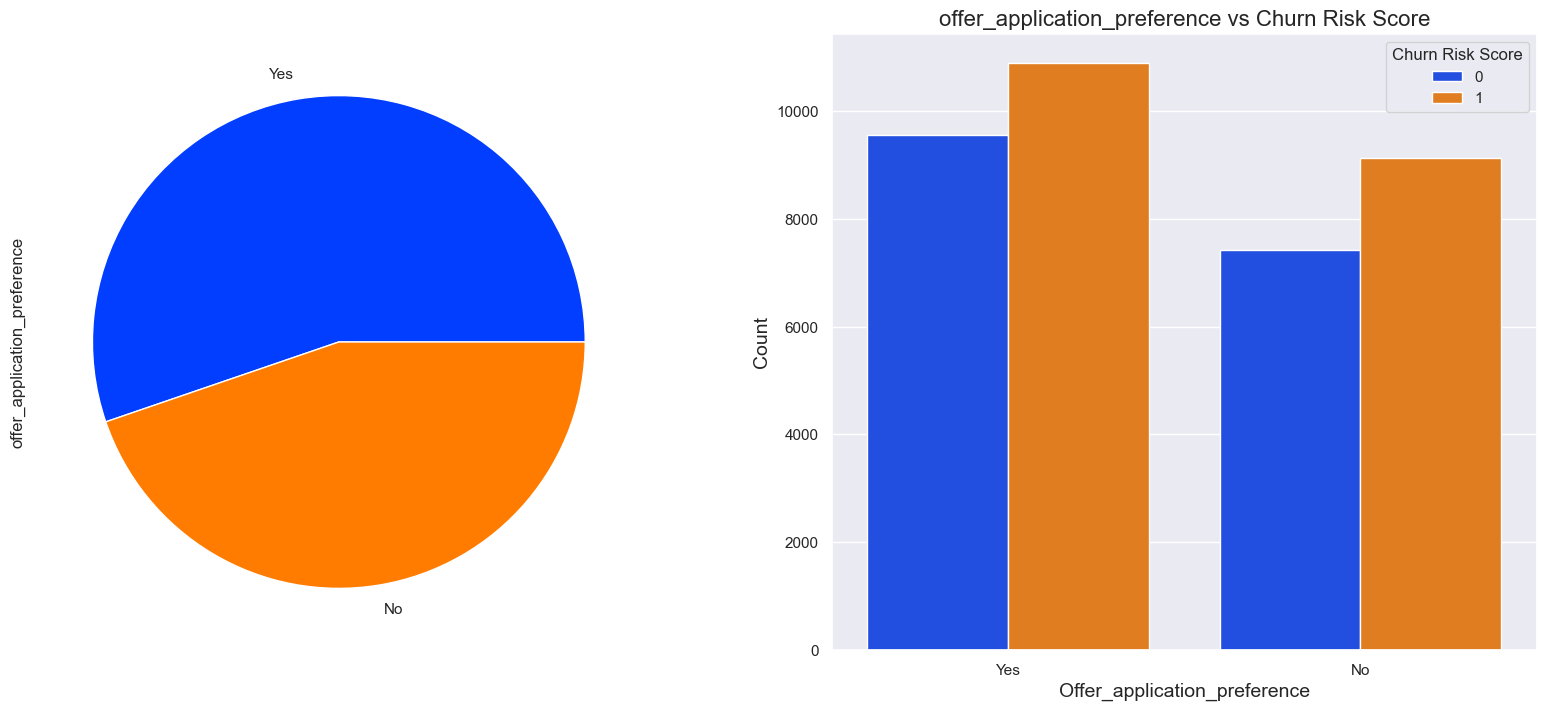

<Figure size 1800x800 with 0 Axes>

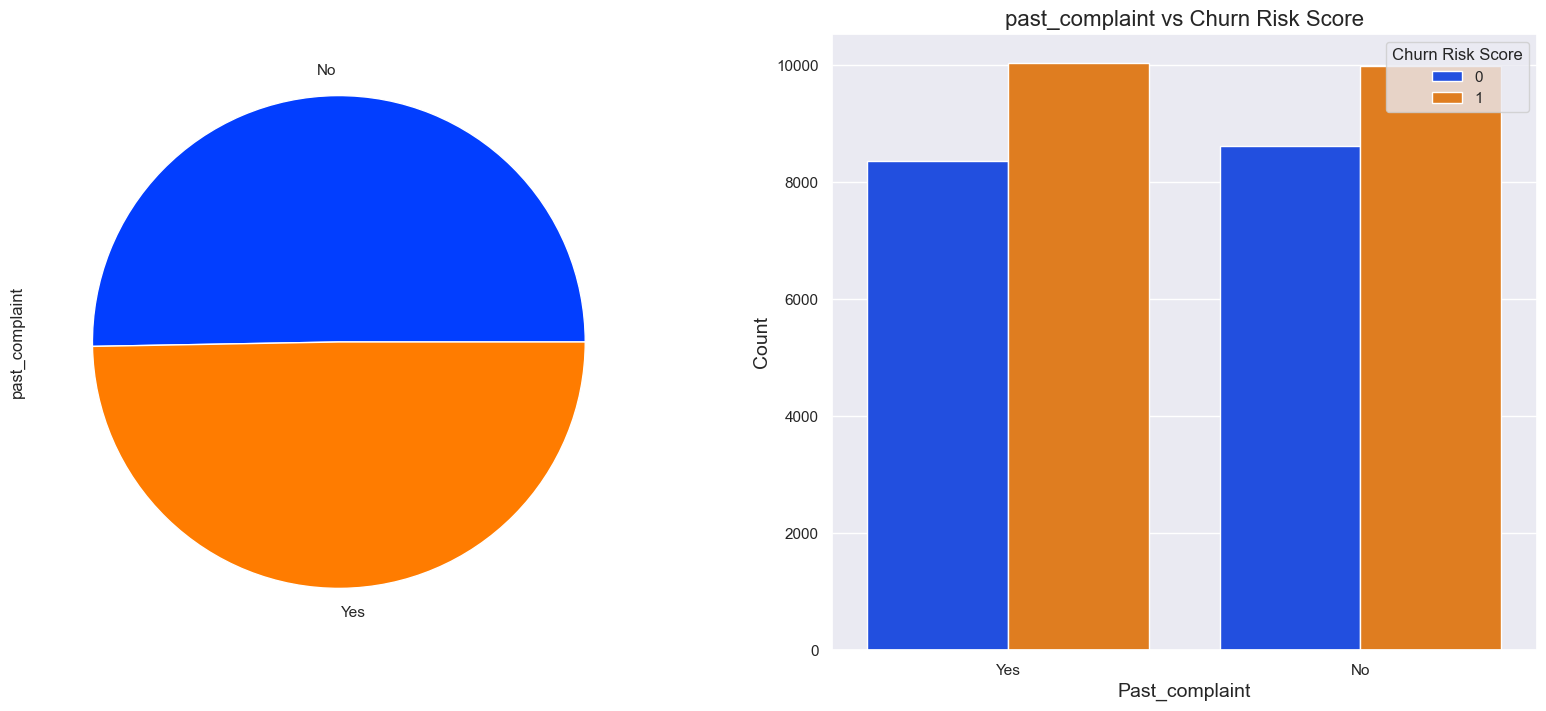

<Figure size 1800x800 with 0 Axes>

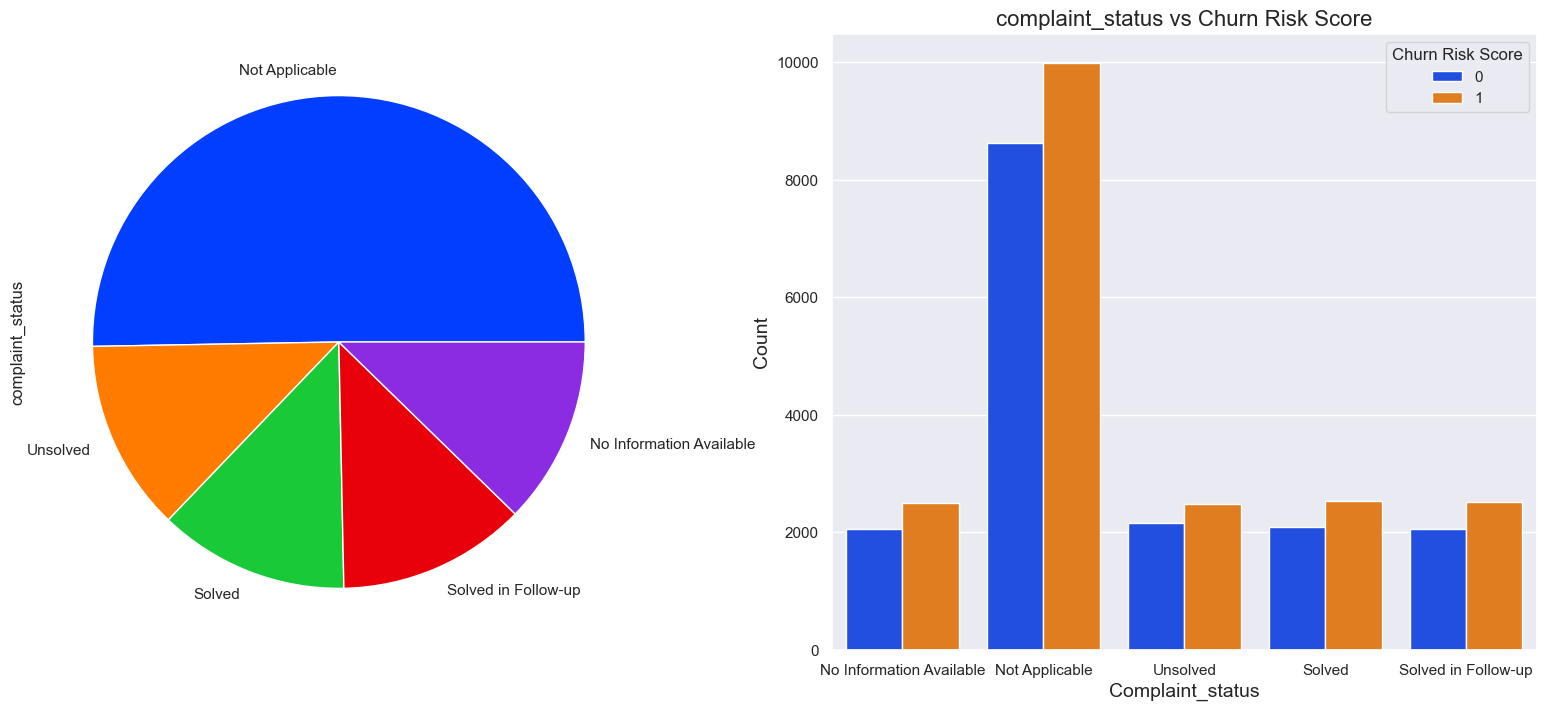

<Figure size 1800x800 with 0 Axes>

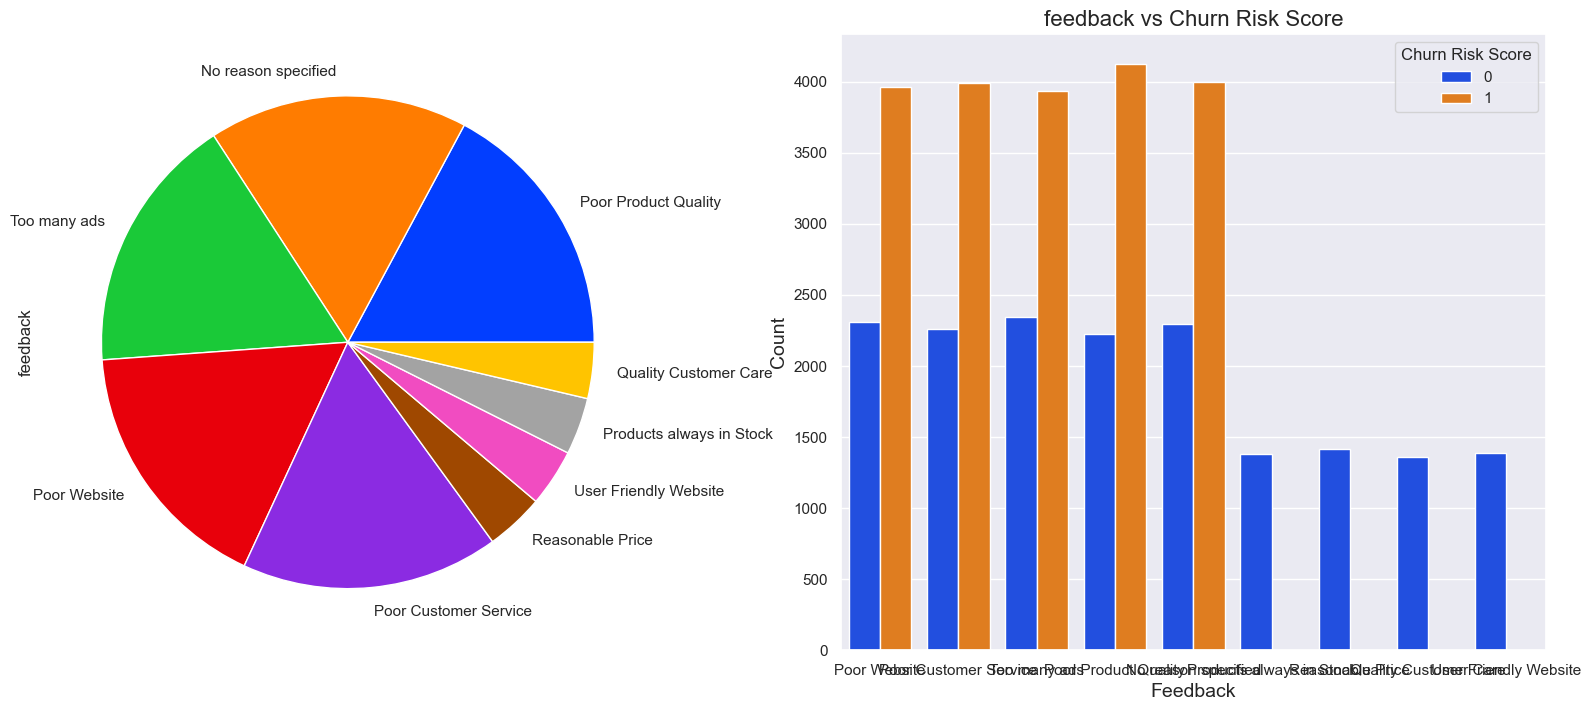

In [20]:
# define color palette
colors = sns.color_palette('bright')

# loop through categorical columns
for col in cat_cols:
  sns.set(color_codes=True)
  plt.figure(figsize=(18,8))
  fig, axes = plt.subplots(ncols=2,figsize=(20,8))

  # adjust colors of pie chart
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True, colors=colors)

  # adjust color palette of countplot
  sns.set_palette(colors)
  sns.countplot(x = col, hue = 'churn_risk_score', data = df)

  # add titles and labels
  plt.title(f'{col} vs Churn Risk Score', fontsize=16)
  plt.xlabel(col.capitalize(), fontsize=14)
  plt.ylabel('Count', fontsize=14)
  plt.legend(title='Churn Risk Score', loc='upper right')

  # display plot
  plt.show()

from this chart, we gain some insight is:
- feedback also shows a relationship with churn rate, where people with good feedback will be not churn, and people with bad feedback tends to churn more. This is also makes sense because, when customer feel that the service is good they will keep using it and when it is bad they will stop using it.
- membership_category has a big relation with churn rate in ur customer, where the highest tier of membership tends to not churn with our services and the customer with no membership or low tier membership has higher tendency to churn.
- looks like we dont see any high correlation with churn risk score based on the chart

### Check Correlation

In this section, we will look for correlation of our data using phik matrix. and then focused on churn risk score

In [21]:
# make phik matrix from dataframe
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


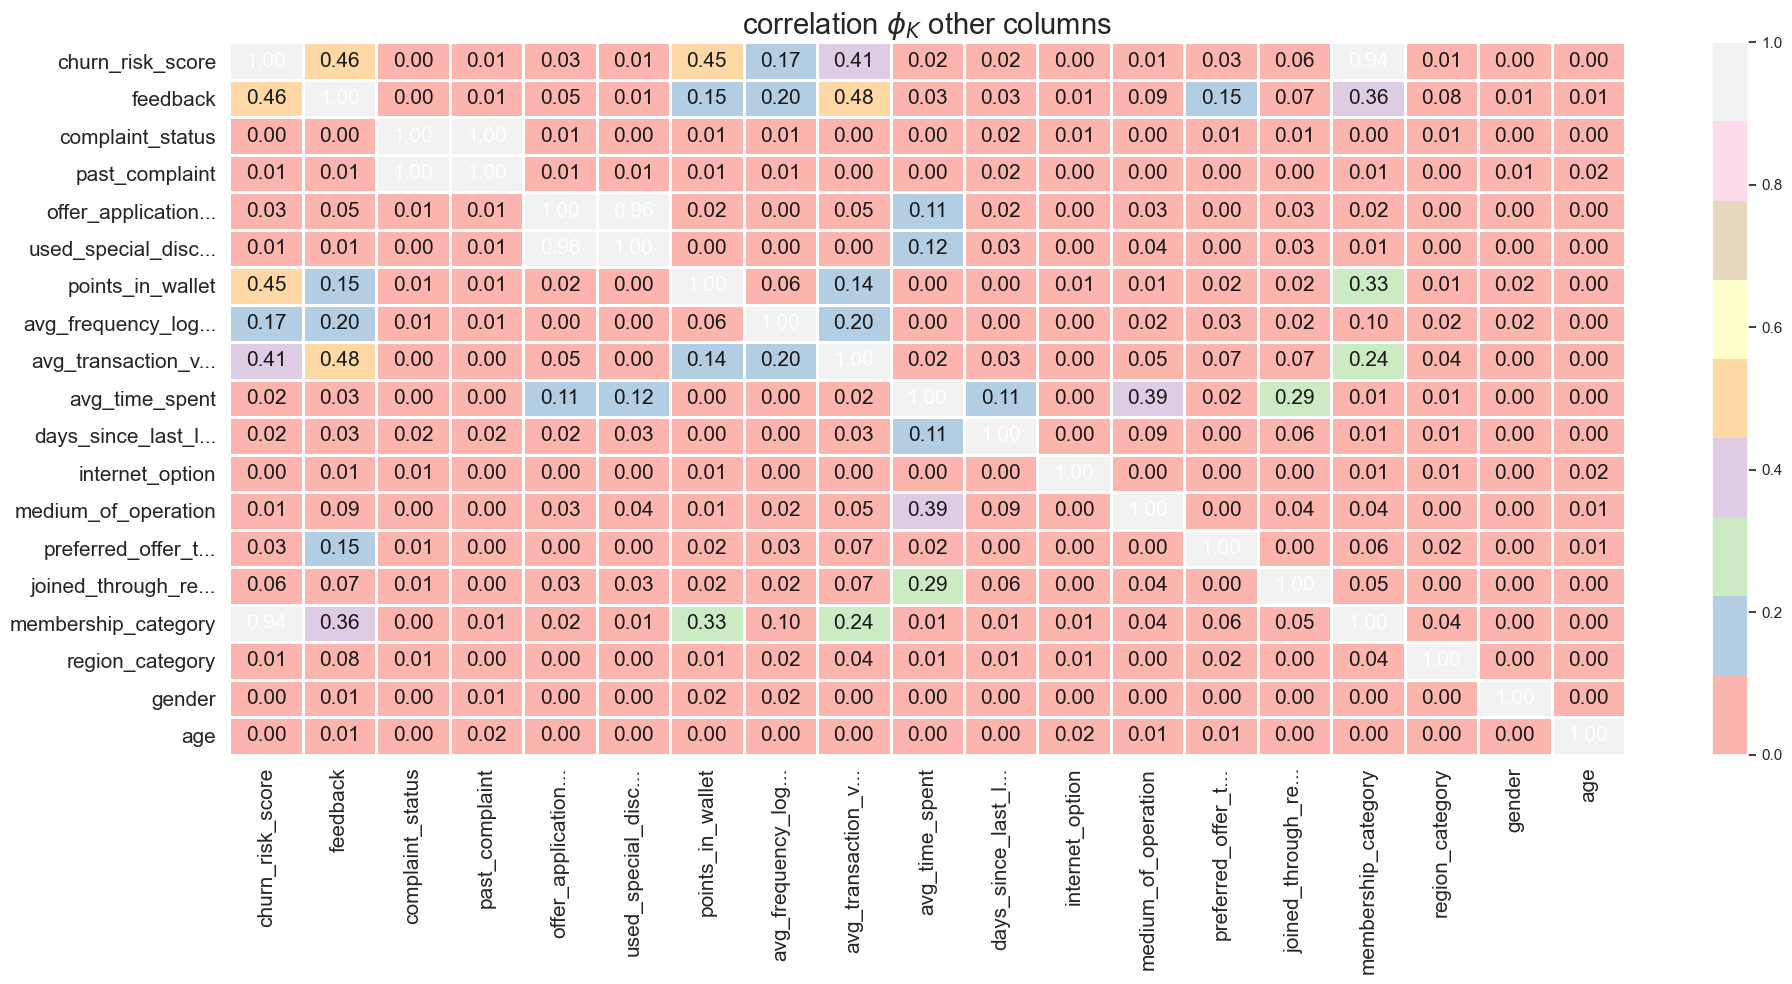

In [22]:
# plot correlation phik
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Pastel1', 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1.5, 
                        figsize=(20,10))
plt.tight_layout()

Based on our phik matrix, our threshold is 1. So we can use  feedback, points_in_wallet, avg_frequency_login_days, avg_transaction_value, and membership_category for our feature.

# v. Feature Engineering/Preprocessing

### Cardinality Checking

We want to see if our categorical data has some high cardinality issues, which may decrease or model performaces.

In [23]:
# show the cardinality of our data categories
for i in df[cat_cols]:
    print(i,df[i].nunique())

gender 2
region_category 3
membership_category 6
joined_through_referral 2
preferred_offer_types 3
medium_of_operation 3
internet_option 3
used_special_discount 2
offer_application_preference 2
past_complaint 2
complaint_status 5
feedback 9


Since our data not more than 10 cardinality we can say if our dataset is not have high cardinality.

### Handling Missing Value

Here we want to measure our data

In [24]:
df.isnull().sum()

age                                0
gender                            59
region_category                 5428
membership_category                0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Let's see the percentage of missing value we have on our data

In [25]:
# check percetage missing value
(df.isnull().sum()/len(df))*100

age                              0.000000
gender                           0.159494
region_category                 14.673443
membership_category              0.000000
joined_through_referral         14.700476
preferred_offer_types            0.778547
medium_of_operation             14.578828
internet_option                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 0.000000
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64

### VIF Checking

In [26]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [27]:
calc_vif(df[num_cols])

,variables,VIF
0,age,4.828416
1,days_since_last_login,3.952174
2,avg_time_spent,1.651760
3,avg_transaction_value,2.944673
4,avg_frequency_login_days,2.952389
5,points_in_wallet,4.849560


our dataset doesn't have multicolinearity between features (not have similar information between features).

### Feature Selection

base on our correlation matrix and multicolinearity check we found the best features for training models :

1. Membership Category
2. Feedback
3. Point in Wallet
4. Average Transaction Value
5. Average Frequency Login Days

In [28]:
fitur = ['feedback','points_in_wallet', 'avg_frequency_login_days','avg_transaction_value', 'membership_category']
target = ['churn_risk_score']

In [29]:
# Make into x and y
x = df[fitur]
y = df[target]

### Train Test Split

In [30]:
x_train_full, x_test,  y_train_full, y_test = train_test_split(x,
                                                               y,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= y
                                                               )

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2, 
                                                  stratify= y_train_full)

now we have 3 data named train, validation, and test.

In [31]:
num_cols = x[['points_in_wallet', 'avg_frequency_login_days', 'avg_transaction_value']].columns.tolist()
cat_cols = x[['feedback', 'membership_category']].columns.tolist()

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')

Number of numerical columns: 3
Numerical columns: ['points_in_wallet', 'avg_frequency_login_days', 'avg_transaction_value']
Number of categorical columns: 2
Categorical columns: ['feedback', 'membership_category']


there's we got 3 numerical columns and 2 categorical columns

### Handling Outlier

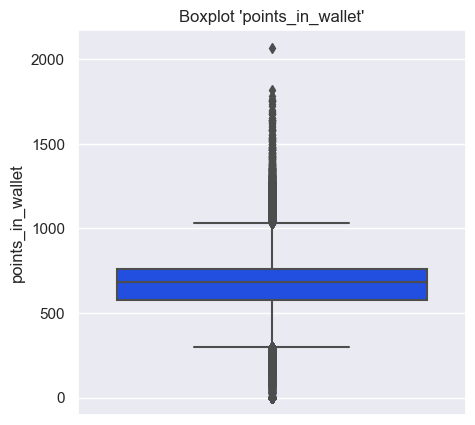

points_in_wallet Kurtosis: 1.3336663397856174
points_in_wallet Skewness: -0.7734917908458531
Columns 'points_in_wallet' Left Moderately Skewed


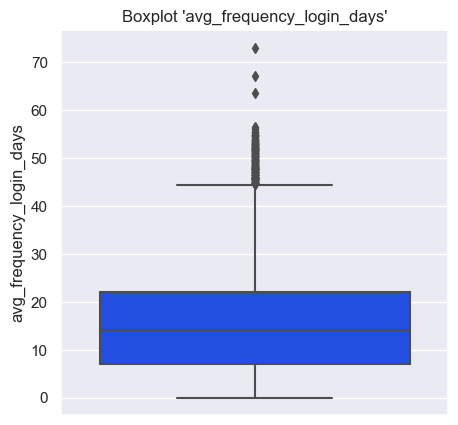

avg_frequency_login_days Kurtosis: 0.26815671188216283
avg_frequency_login_days Skewness: 0.38986070002523915
Columns 'avg_frequency_login_days' Normal Distribution


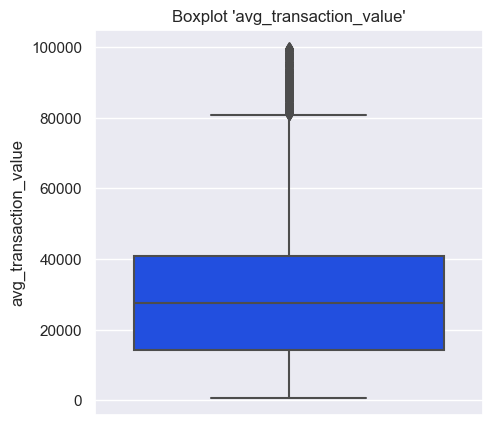

avg_transaction_value Kurtosis: 1.428287011596546
avg_transaction_value Skewness: 1.0110271627457472
Columns 'avg_transaction_value' Right Highly Skewed


In [32]:
def dist(df, col):
    fig, axes = plt.subplots(figsize = (5, 5))
    
    # boxplot
    sns.boxplot(y=df[col], ax = axes)
    axes.set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' Normal Distribution".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' Right Moderately Skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' Right Highly Skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' Left Moderately Skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' Left Highly Skewed".format(col))

df_num = x[num_cols]

for col in df_num.columns:
    dist(df[num_cols], col)

based on boxplot above we can see if our features point_in_wallet, avg_frequency_login_days, avg_transactions_value have outlier.

### Pipeline For Preprocessing

In [33]:
skew_feature = ['points_in_wallet','avg_transaction_value']
skew_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', StandardScaler())
    ])

nor_feature = ['avg_frequency_login_days']
nor_pipe = Pipeline([
    ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
    ('scaler', StandardScaler())
])

ord_feature = ['membership_category']
ord_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ])

ohe_feature = ['feedback']
ohe_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

# Preprocessing pipeline
preprocessing = ColumnTransformer([
        ("skew", skew_pipe, skew_feature),
        ("nor", nor_pipe, nor_feature),
        ("ord", ord_pipe, ord_feature),
        ("ohe", ohe_pipe, ohe_feature)
    ])
preprocessing

ColumnTransformer(transformers=[('skew',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('scaler', StandardScaler())]),
                                 ['points_in_wallet', 'avg_transaction_value']),
                                ('nor',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(tail='both')),
                                                 ('scaler', StandardScaler())]),
                                 ['avg_frequency_login_days']),
                                ('ord'

- For normal distribution we use capping to handle our outlier, then we proceed to scale them using standard scaler.
- For Highly Skewed, we use imputer with median, because our data are skewed. We also use capping to handle our outlier, then we proceed to scale them using standard scaler.
- For membership category feature we only impute some missing value then encode it with ordinal encoder. 
- For feedback feature we only impute some missing value then encode it with one hot encoder. 

### Feature Scalling and Encoding

In [34]:
# transform our data sets
x_train_final = preprocessing.fit_transform(x_train)
x_val_final = preprocessing.transform(x_val)
x_test_final = preprocessing.transform(x_test)

now our data is ready to use in model.

# vi. Model Definition

### Tensorflow Pipeline

In [35]:
# settings random lock for shuffling data
tf.random.set_seed(1870)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_final, y_train))
train_dataset = train_dataset.shuffle(buffer_size=6821).batch(78)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val_final, y_val))
val_dataset = val_dataset.batch(78)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test_final, y_test))
test_dataset = test_dataset.batch(78)

In [36]:
# defining neuron amount
alp = 10
inp = x_train_final.shape[1]
out = 1
hid = int(len(x_train_final)/(alp*(inp+out)))
print(f'Neuron count on hidden layer: {hid}')

# Define Sequential Model's Architecture
model_seq = tf.keras.models.Sequential([
                                        tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
                                        tf.keras.layers.Dense(hid, activation='relu'),
                                        tf.keras.layers.Dense(hid/2, activation='relu'),
                                        tf.keras.layers.Dense(hid/4, activation='relu'),
                                        tf.keras.layers.Dense(out, activation='sigmoid')
                                        ])
model_seq.summary()

Neuron count on hidden layer: 169
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 169)               2366      
                                                                 
 dense_2 (Dense)             (None, 84)                14280     
                                                                 
 dense_3 (Dense)             (None, 42)                3570      
                                                                 
 dense_4 (Dense)             (None, 1)                 43        
                                                                 
Total params: 20,441
Trainable params: 20,441
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Define Functional Model's Architecture
input_lyr = tf.keras.layers.Input(shape=(x_train_final.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
layers = tf.keras.layers.Dense(hid, activation='relu')(layers)
layers = tf.keras.layers.Dense(hid/2, activation='relu')(layers)
layers = tf.keras.layers.Dense(hid/4, activation='relu')(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_func = tf.keras.models.Model(inputs=input_lyr,outputs=output)

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_5 (Dense)             (None, 13)                182       
                                                                 
 dense_6 (Dense)             (None, 169)               2366      
                                                                 
 dense_7 (Dense)             (None, 84)                14280     
                                                                 
 dense_8 (Dense)             (None, 42)                3570      
                                                                 
 dense_9 (Dense)             (None, 1)                 43        
                                                                 
Total params: 20,441
Trainable params: 20,441
Non-trainable p

In [38]:
# Define Training Configuration (Optimizer, Loss, Metrics)
model_seq.compile(
                  optimizer=tf.keras.optimizers.Adam(), # Optimizer
                  loss='binary_crossentropy', # Loss function to minimize   
                  metrics='Accuracy' # metrics to monitor
                  )

model_func.compile(
                  optimizer=tf.keras.optimizers.Adam(), # Optimizer
                  loss='binary_crossentropy', # Loss function to minimize   
                  metrics='Accuracy' # metrics to monitor
                  )

# vii. Model Training

In [39]:
# Train sequence model
model_seq_train = model_seq.fit(train_dataset, validation_data=(val_dataset), epochs = 25)

Epoch 1/25
304/304 [==============================] - 1s 2ms/step - loss: 0.4312 - Accuracy: 0.8077 - val_loss: 0.3218 - val_Accuracy: 0.8694
Epoch 2/25
304/304 [==============================] - 0s 1ms/step - loss: 0.2826 - Accuracy: 0.8832 - val_loss: 0.2691 - val_Accuracy: 0.8828
Epoch 3/25
304/304 [==============================] - 0s 1ms/step - loss: 0.2520 - Accuracy: 0.8932 - val_loss: 0.2500 - val_Accuracy: 0.9025
Epoch 4/25
304/304 [==============================] - 0s 1ms/step - loss: 0.2403 - Accuracy: 0.8990 - val_loss: 0.2590 - val_Accuracy: 0.8995
Epoch 5/25
304/304 [==============================] - 0s 1ms/step - loss: 0.2216 - Accuracy: 0.9072 - val_loss: 0.2188 - val_Accuracy: 0.9130
Epoch 6/25
304/304 [==============================] - 0s 1ms/step - loss: 0.2059 - Accuracy: 0.9156 - val_loss: 0.2071 - val_Accuracy: 0.9182
Epoch 7/25
304/304 [==============================] - 0s 1ms/step - loss: 0.1905 - Accuracy: 0.9234 - val_loss: 0.1935 - val_Accuracy: 0.9223
Epoch 

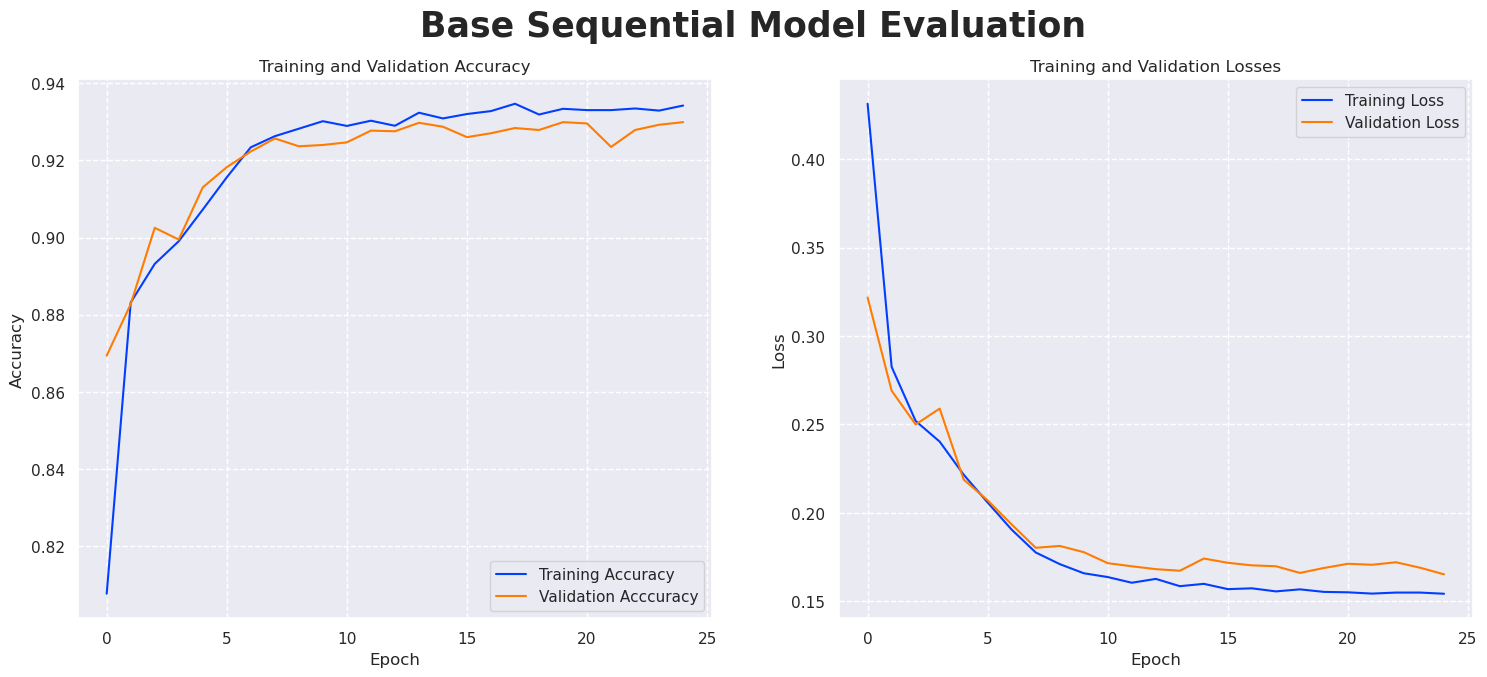

In [40]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Base Sequential Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_seq_train.history['Accuracy'],label="Training Accuracy")
plt.plot(model_seq_train.history['val_Accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_seq_train.history['loss'], label="Training Loss")
plt.plot(model_seq_train.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

sequential models we have create still have gradient descent exploding. so we need to improve this model.

In [41]:
# Train function model
model_func_train = model_func.fit(train_dataset,validation_data=(val_dataset),epochs=25)

Epoch 1/25
304/304 [==============================] - 1s 2ms/step - loss: 0.4386 - Accuracy: 0.7969 - val_loss: 0.3278 - val_Accuracy: 0.8642
Epoch 2/25
304/304 [==============================] - 0s 1ms/step - loss: 0.2608 - Accuracy: 0.8978 - val_loss: 0.2324 - val_Accuracy: 0.9132
Epoch 3/25
304/304 [==============================] - 0s 1ms/step - loss: 0.2161 - Accuracy: 0.9155 - val_loss: 0.2062 - val_Accuracy: 0.9155
Epoch 4/25
304/304 [==============================] - 0s 1ms/step - loss: 0.1970 - Accuracy: 0.9205 - val_loss: 0.1920 - val_Accuracy: 0.9238
Epoch 5/25
304/304 [==============================] - 0s 1ms/step - loss: 0.1846 - Accuracy: 0.9225 - val_loss: 0.1842 - val_Accuracy: 0.9252
Epoch 6/25
304/304 [==============================] - 0s 1ms/step - loss: 0.1776 - Accuracy: 0.9262 - val_loss: 0.1887 - val_Accuracy: 0.9216
Epoch 7/25
304/304 [==============================] - 0s 1ms/step - loss: 0.1748 - Accuracy: 0.9276 - val_loss: 0.1796 - val_Accuracy: 0.9214
Epoch 

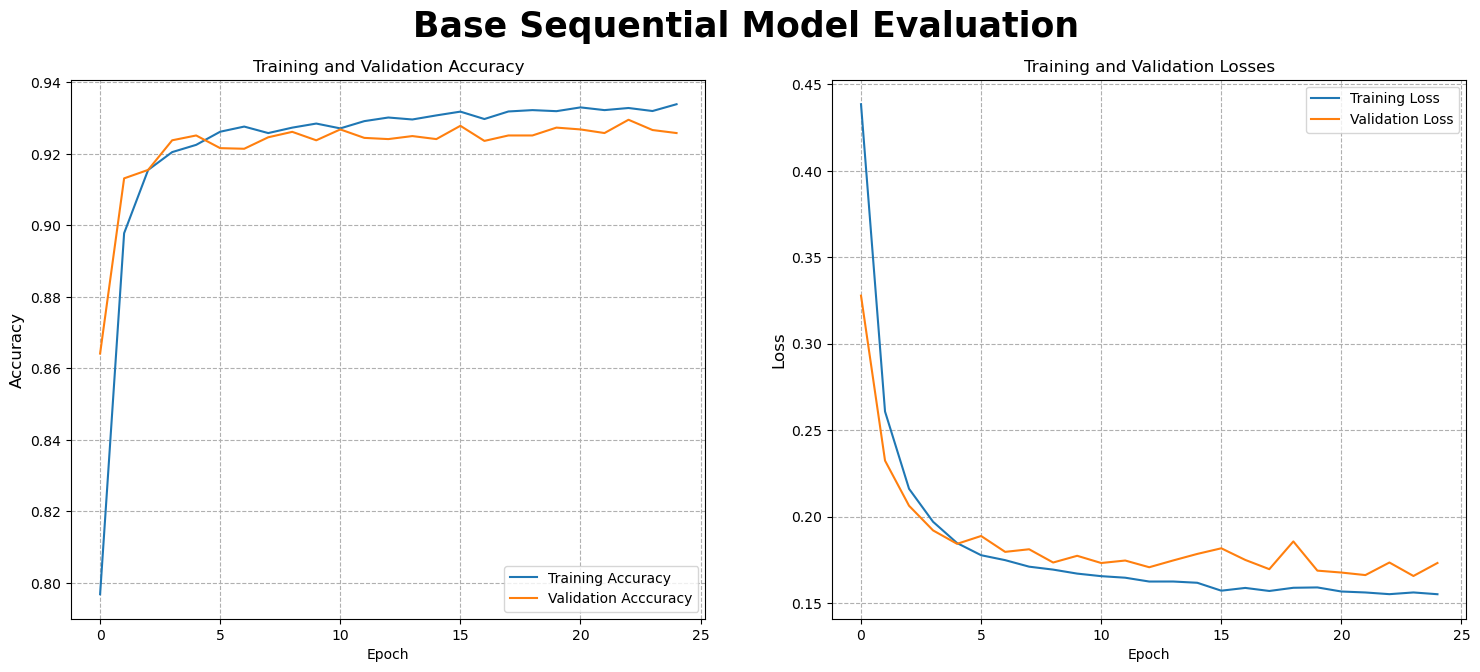

In [42]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Base Function Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_func_train.history['Accuracy'],label="Training Accuracy")
plt.plot(model_func_train.history['val_Accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_func_train.history['loss'], label="Training Loss")
plt.plot(model_func_train.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

functional models we have create still have gradient descent exploding. so this model is not good for predict.

# viii. Model Improvement

### Improving Model Sequence

In [43]:
# Define Sequential Model's Architecture
model_seq_tunning = tf.keras.models.Sequential([
                                                tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
                                                tf.keras.layers.Dense(hid, activation='relu'),
                                                tf.keras.layers.BatchNormalization(),
                                                tf.keras.layers.Dense(hid/2, activation='relu'),
                                                tf.keras.layers.BatchNormalization(),
                                                tf.keras.layers.Dense(hid/4, activation='relu'),
                                                tf.keras.layers.Dropout(0.2),
                                                tf.keras.layers.Dense(out, activation='sigmoid')
                                                ])
model_seq_tunning.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 13)                182       
                                                                 
 dense_11 (Dense)            (None, 169)               2366      
                                                                 
 batch_normalization (BatchN  (None, 169)              676       
 ormalization)                                                   
                                                                 
 dense_12 (Dense)            (None, 84)                14280     
                                                                 
 batch_normalization_1 (Batc  (None, 84)               336       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 42)               

### Improving Model Function

In [44]:
# Define Functional Model's Architecture
input_lyr = tf.keras.layers.Input(shape=(x_train_final.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid/2, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid/4, activation='relu')(layers)
layers = tf.keras.layers.Dropout(0.2)(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_func_tunning = tf.keras.models.Model(inputs=input_lyr,outputs=output)

model_func_tunning.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_15 (Dense)            (None, 13)                182       
                                                                 
 batch_normalization_2 (Batc  (None, 13)               52        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 169)               2366      
                                                                 
 batch_normalization_3 (Batc  (None, 169)              676       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 84)                1428

In [45]:
# Define Training Tunning Configuration (Optimizer, Loss, Metrics)
model_seq_tunning.compile(
                          optimizer=tf.keras.optimizers.Adam(), # Optimizer
                          loss='binary_crossentropy', # Loss function to minimize   
                          metrics='Accuracy' # metrics to monitor
                          )

model_func_tunning.compile(
                           optimizer=tf.keras.optimizers.Adam(), # Optimizer
                           loss='binary_crossentropy', # Loss function to minimize   
                           metrics='Accuracy' # metrics to monitor
                           )

In [46]:
# Using early stop as callback
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train our model
model_seq_train_tuning = model_seq_tunning.fit(train_dataset, validation_data=(val_dataset), epochs = 25, callbacks = [early_stop])

Epoch 1/25
304/304 [==============================] - 1s 2ms/step - loss: 0.3945 - Accuracy: 0.8280 - val_loss: 0.3649 - val_Accuracy: 0.8674
Epoch 2/25
304/304 [==============================] - 1s 2ms/step - loss: 0.2383 - Accuracy: 0.9070 - val_loss: 0.2161 - val_Accuracy: 0.9094
Epoch 3/25
304/304 [==============================] - 1s 2ms/step - loss: 0.2035 - Accuracy: 0.9166 - val_loss: 0.2025 - val_Accuracy: 0.9137
Epoch 4/25
304/304 [==============================] - 1s 2ms/step - loss: 0.1926 - Accuracy: 0.9198 - val_loss: 0.1897 - val_Accuracy: 0.9216
Epoch 5/25
304/304 [==============================] - 1s 2ms/step - loss: 0.1781 - Accuracy: 0.9248 - val_loss: 0.2040 - val_Accuracy: 0.9164
Epoch 6/25
304/304 [==============================] - 1s 2ms/step - loss: 0.1735 - Accuracy: 0.9265 - val_loss: 0.1793 - val_Accuracy: 0.9240
Epoch 7/25
304/304 [==============================] - 1s 2ms/step - loss: 0.1714 - Accuracy: 0.9269 - val_loss: 0.1811 - val_Accuracy: 0.9206
Epoch 

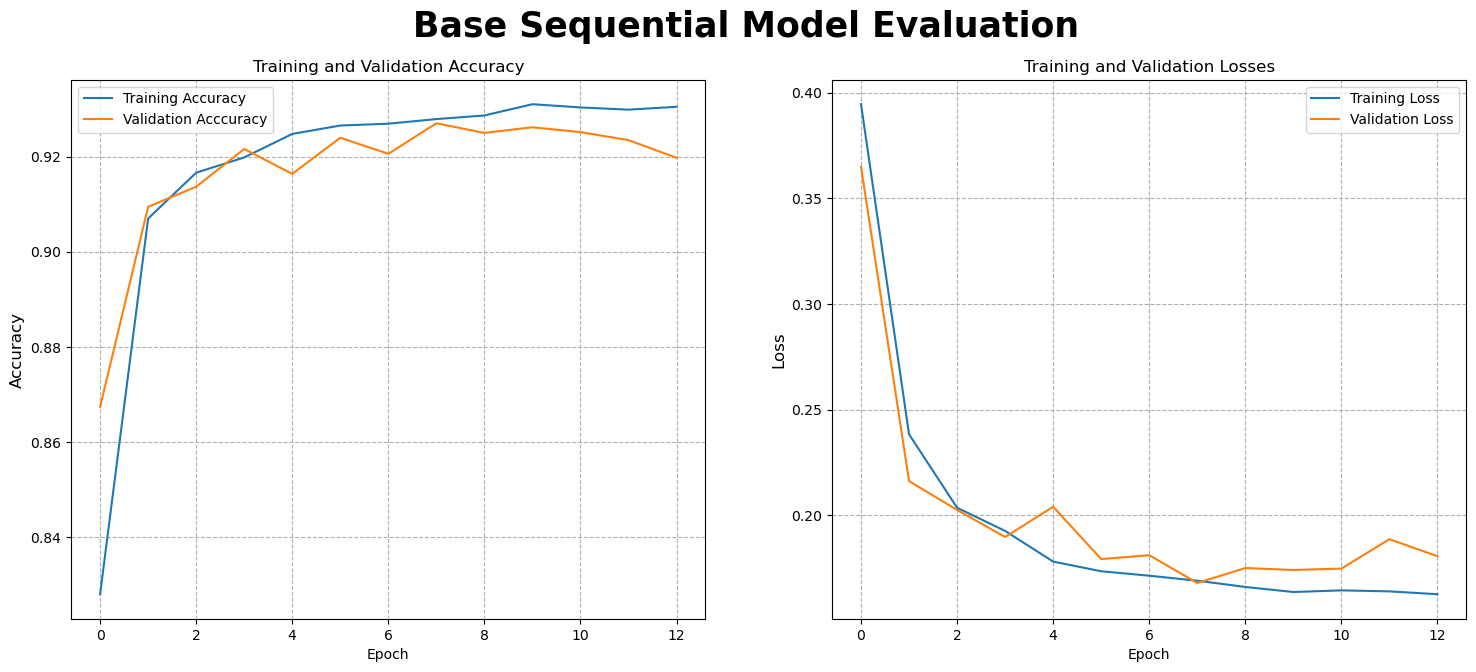

In [47]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Improve Sequential Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_seq_train_tuning.history['Accuracy'],label="Training Accuracy")
plt.plot(model_seq_train_tuning.history['val_Accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_seq_train_tuning.history['loss'], label="Training Loss")
plt.plot(model_seq_train_tuning.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Sequential models we have create still have gradient descent exploding. so, this model is not good for predict

In [48]:
# Train functional model Tunning
model_func_train_tunning = model_func_tunning.fit(train_dataset,validation_data=(val_dataset),epochs=25)

Epoch 1/25
304/304 [==============================] - 1s 2ms/step - loss: 0.3537 - Accuracy: 0.8502 - val_loss: 0.3307 - val_Accuracy: 0.8623
Epoch 2/25
304/304 [==============================] - 1s 2ms/step - loss: 0.2328 - Accuracy: 0.9068 - val_loss: 0.2058 - val_Accuracy: 0.9160
Epoch 3/25
304/304 [==============================] - 1s 2ms/step - loss: 0.2054 - Accuracy: 0.9156 - val_loss: 0.1877 - val_Accuracy: 0.9221
Epoch 4/25
304/304 [==============================] - 1s 2ms/step - loss: 0.1929 - Accuracy: 0.9188 - val_loss: 0.1781 - val_Accuracy: 0.9218
Epoch 5/25
304/304 [==============================] - 1s 2ms/step - loss: 0.1843 - Accuracy: 0.9237 - val_loss: 0.1761 - val_Accuracy: 0.9235
Epoch 6/25
304/304 [==============================] - 1s 2ms/step - loss: 0.1792 - Accuracy: 0.9251 - val_loss: 0.1762 - val_Accuracy: 0.9250
Epoch 7/25
304/304 [==============================] - 1s 2ms/step - loss: 0.1788 - Accuracy: 0.9244 - val_loss: 0.1705 - val_Accuracy: 0.9226
Epoch 

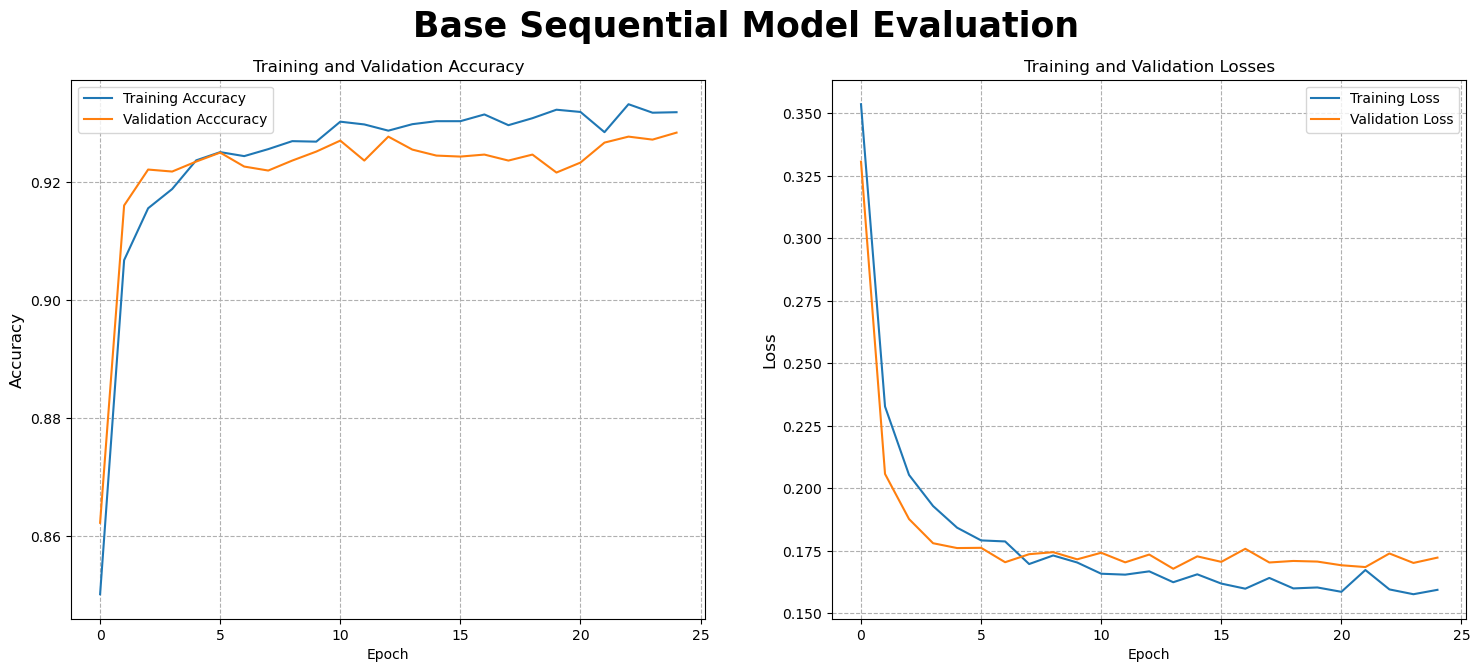

In [49]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Improve Function Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_func_train_tunning.history['Accuracy'],label="Training Accuracy")
plt.plot(model_func_train_tunning.history['val_Accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_func_train_tunning.history['loss'], label="Training Loss")
plt.plot(model_func_train_tunning.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

functional models we have create still have gradient descent exploding. so we can say this modelis good for predict

In [50]:
# make a prediction using test sets
y_prob_seq = model_seq.predict(x_test_final)
y_pred_seq = np.round(y_prob_seq)

y_prob_seq_tunning = model_seq_tunning.predict(x_test_final)
y_pred_seq_tunning = np.round(y_prob_seq_tunning)

y_prob_func = model_func.predict(x_test_final)
y_pred_func = np.round(y_prob_func)

y_prob_func_tunning = model_func_tunning.predict(x_test_final)
y_pred_func_tunning = np.round(y_prob_func_tunning)

232/232 [==============================] - 0s 615us/step


In [51]:
# evaluate model using test sets
model_seq_eval = model_seq.evaluate(test_dataset)
model_seq_tunning_eval = model_seq_tunning.evaluate(test_dataset)
model_func_eval = model_func.evaluate(test_dataset)
model_func_tunning_eval = model_func_tunning.evaluate(test_dataset)

print(f'model seq (loss : {model_seq_eval[0]} |', f'accuracy : {model_seq_eval[1]})')
print(f'model seq tunning (loss : {model_seq_tunning_eval[0]} |', f'accuracy : {model_seq_tunning_eval[1]})')
print(f'model func (loss : {model_func_eval[0]} |', f'accuracy : {model_func_eval[1]})')
print(f'model func tunning (loss : {model_func_tunning_eval[0]} |', f'accuracy : {model_func_tunning_eval[1]})')

95/95 [==============================] - 0s 891us/step - loss: 0.1651 - Accuracy: 0.9292
model seq (loss : 0.16368655860424042 | accuracy : 0.9290444850921631)
model seq tunning (loss : 0.17328770458698273 | accuracy : 0.925125002861023)
model func (loss : 0.16738466918468475 | accuracy : 0.9282335638999939)
model func tunning (loss : 0.16513094305992126 | accuracy : 0.9291796088218689)


In [52]:
# show classification report of all model predictions
print('Sequential Model')
print(classification_report(y_test,y_pred_seq))
print('AUC:',roc_auc_score(y_test,y_prob_seq))
print('')
print('Sequential Tunning Model')
print(classification_report(y_test,y_pred_seq_tunning))
print('AUC:',roc_auc_score(y_test,y_prob_seq_tunning))
print('')
print('Functional Model')
print(classification_report(y_test,y_pred_func))
print('AUC:',roc_auc_score(y_test,y_prob_func))
print('')
print('Functional Tunning Model')
print(classification_report(y_test,y_pred_func_tunning))
print('AUC:',roc_auc_score(y_test,y_prob_func_tunning))

Sequential Model
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3396
           1       0.92      0.95      0.94      4003

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399

AUC: 0.9730574198326519

Sequential Tunning Model
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3396
           1       0.92      0.94      0.93      4003

    accuracy                           0.93      7399
   macro avg       0.93      0.92      0.92      7399
weighted avg       0.93      0.93      0.93      7399

AUC: 0.9713071497907783

Functional Model
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3396
           1       0.93      0.94      0.93      4003

    accuracy                           0.93      7399
   macro avg       

# ix. Model Saving

In [53]:
# Save pipeline process
with open("pipeline.pkl", "wb") as pipeline:
    pickle.dump(preprocessing, pipeline)
    
# save model
model_func.save('best_model.h5')

# x. Conclusion

From this model we conclude that:
1. We choose accuracy and AUC score because Accuracy can measure the percentage of correct predictions made by a model, and AUC score will measure the ability of a model to distinguish between positive (churned) and negative (not churned) cases. AUC score ranges from 0 to 1, where a value of 1 indicates a perfect classifier and a value of 0.5 indicates a random classifier.
2. Our model can be used to predict the churn rate in our company.
3. From 4 model we try and use, the best model is the optimized Functional tuning model. This is because the result looks like a goodfit and also do not have a gradient problem.
4. from this result may predict the data with a good quality prediction which is good.
In this model we use 10 features to predict our model, the features are: 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'feedback','membership_category'.

From EDA result, we know that:
1. We have some missing values and outliers in our data, we then do some preprocessing to make sure we handle those problems.
2. The highest correlation with our target appeared on memberhsip category and feedback.

Further improvement may we need to are:

1. Using different rule on using numbers of neuron in hidden layer.
2. Using or adding different features.
3. Try some combination of optimizer or dropout value.